In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aermanager.aerparser import load_events_from_file
from aermanager.parsers import parse_dvs_ibm
import datetime

In [2]:
files = glob.glob("./DvsGesture/*.aedat")
df_results = pd.DataFrame(index = range(len(files)), columns = ['user', 'lighting', 'mean_event_rate', 'median_event_rate', 'std_event_rate'])

Processing file 1of 122 files. ...
Processing file 2of 122 files. ...
Processing file 3of 122 files. ...
Processing file 4of 122 files. ...
Processing file 5of 122 files. ...
Processing file 6of 122 files. ...
Processing file 7of 122 files. ...
Processing file 8of 122 files. ...
Processing file 9of 122 files. ...
Processing file 10of 122 files. ...
Processing file 11of 122 files. ...


/Users/ahnaf/opt/anaconda3/envs/msc37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Processing file 12of 122 files. ...
Processing file 13of 122 files. ...
Processing file 14of 122 files. ...
Processing file 15of 122 files. ...
Processing file 16of 122 files. ...
Processing file 17of 122 files. ...
Processing file 18of 122 files. ...
Processing file 19of 122 files. ...
Processing file 20of 122 files. ...
Processing file 21of 122 files. ...
Processing file 22of 122 files. ...
Processing file 23of 122 files. ...
Processing file 24of 122 files. ...
Processing file 25of 122 files. ...
Processing file 26of 122 files. ...
Processing file 27of 122 files. ...
Processing file 28of 122 files. ...
Processing file 29of 122 files. ...
Processing file 30of 122 files. ...
Processing file 31of 122 files. ...
Processing file 32of 122 files. ...
Processing file 33of 122 files. ...
Processing file 34of 122 files. ...
Processing file 35of 122 files. ...
Processing file 36of 122 files. ...
Processing file 37of 122 files. ...
Processing file 38of 122 files. ...
Processing file 39of 122 fil

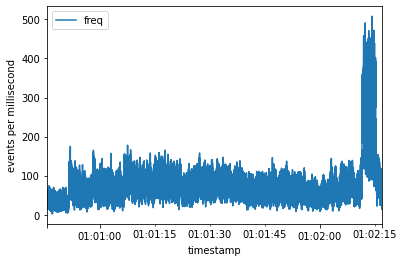

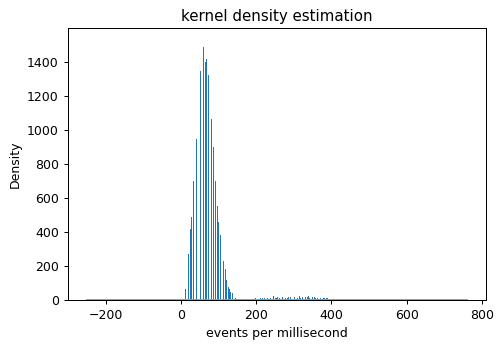

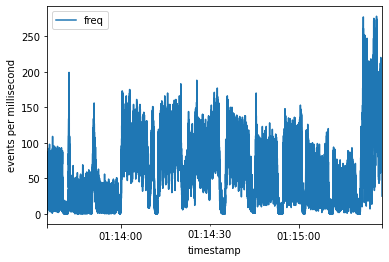

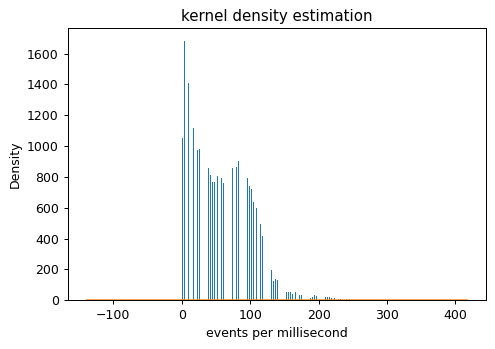

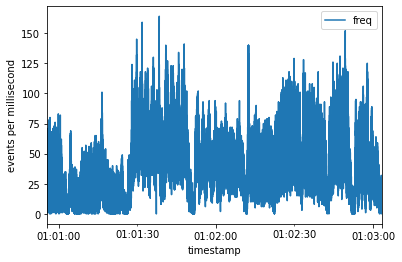

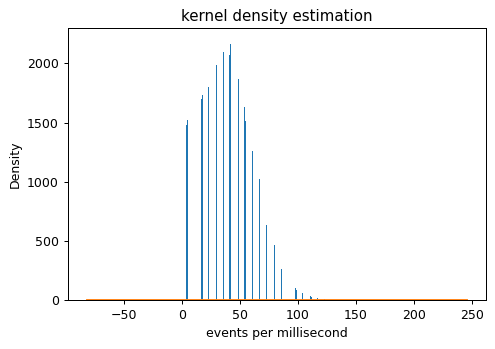

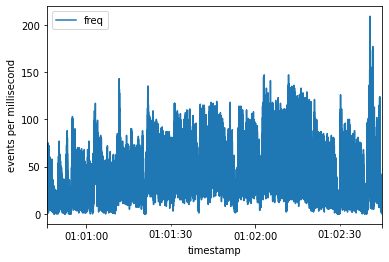

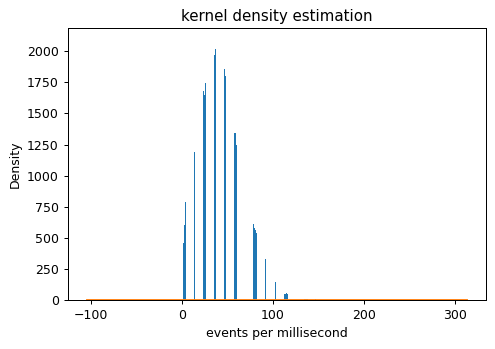

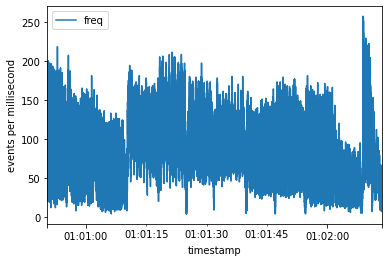

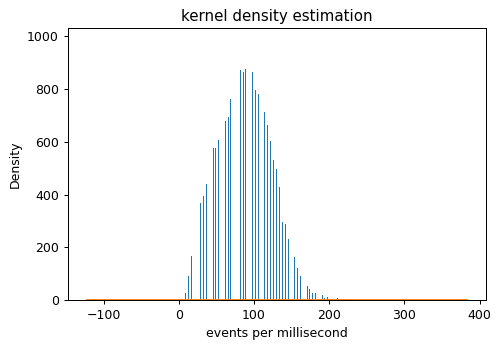

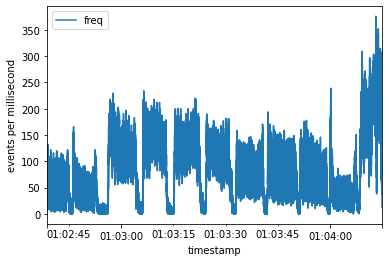

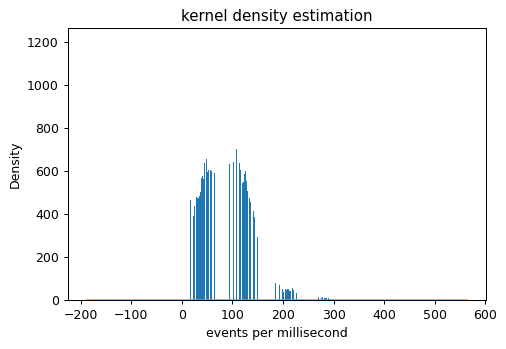

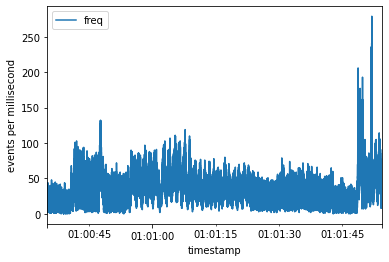

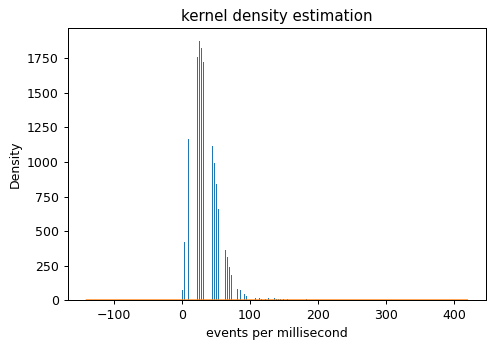

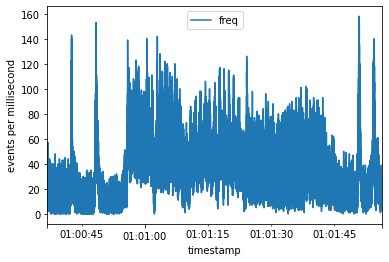

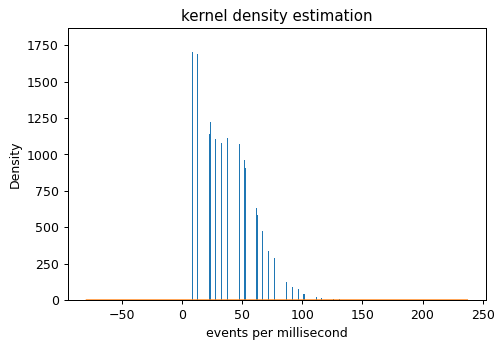

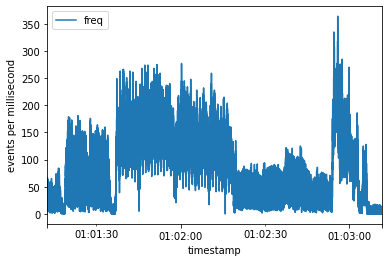

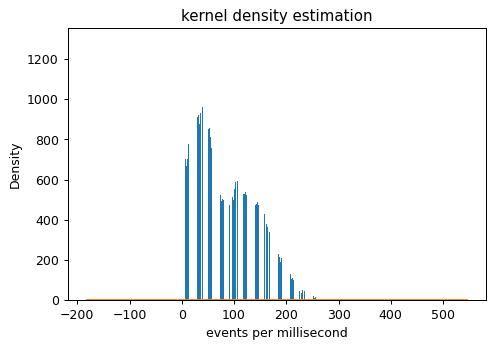

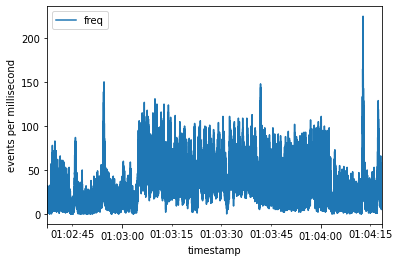

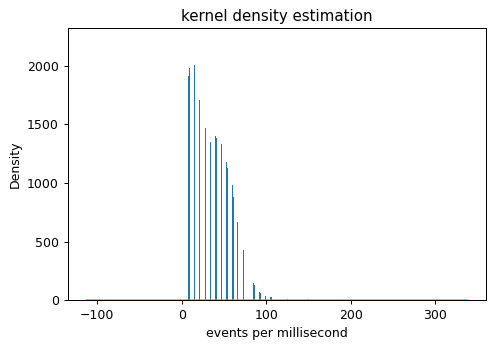

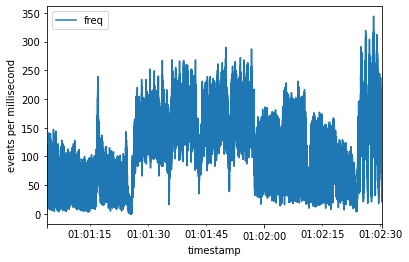

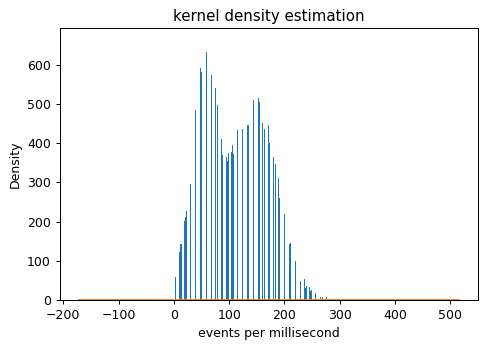

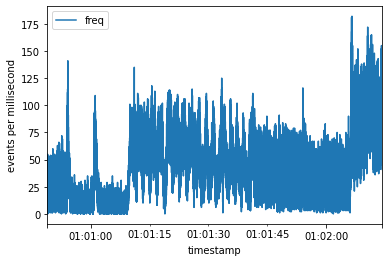

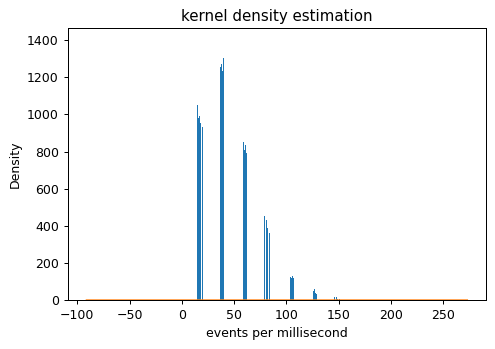

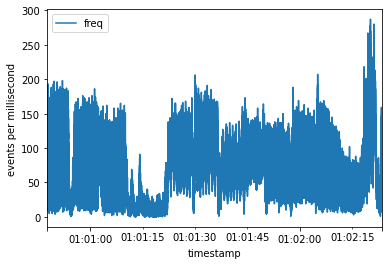

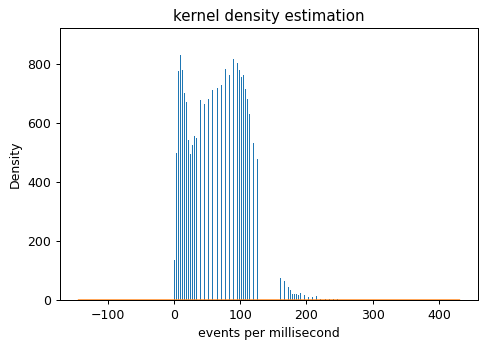

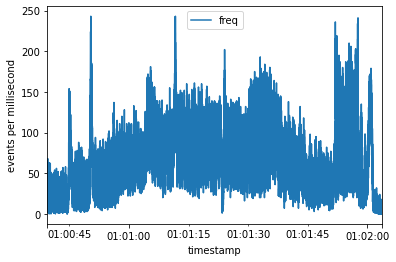

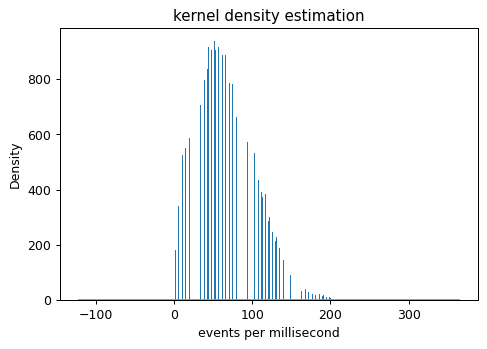

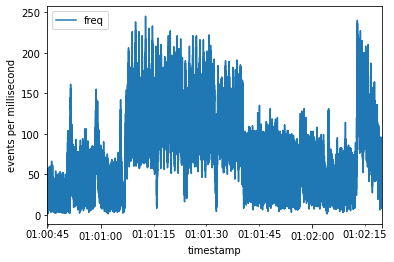

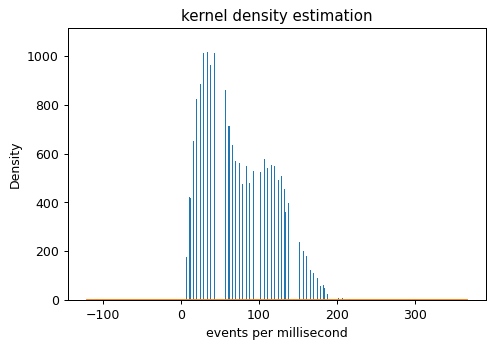

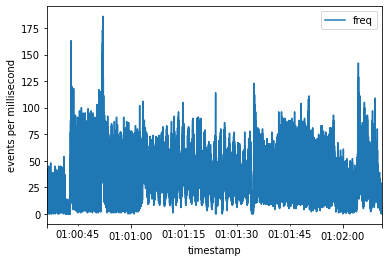

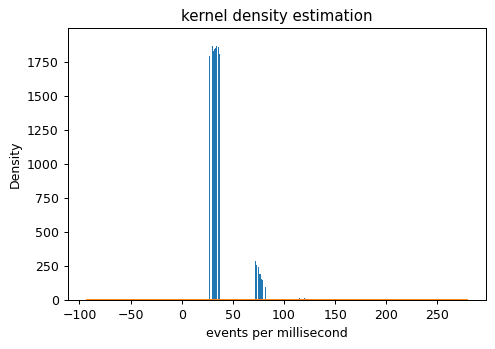

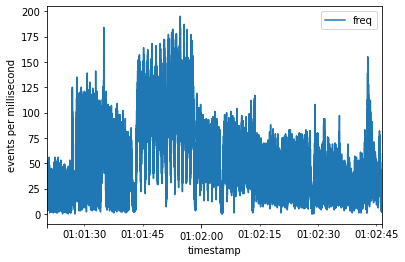

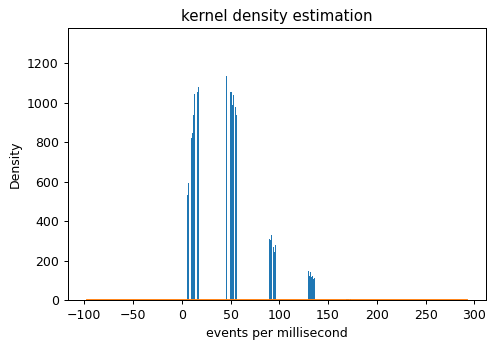

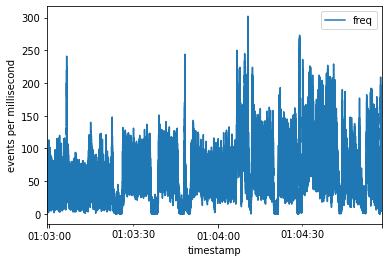

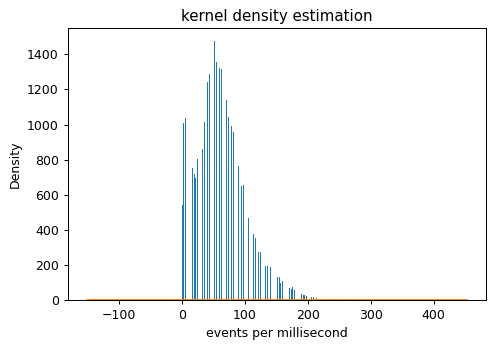

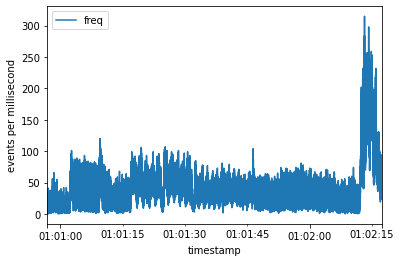

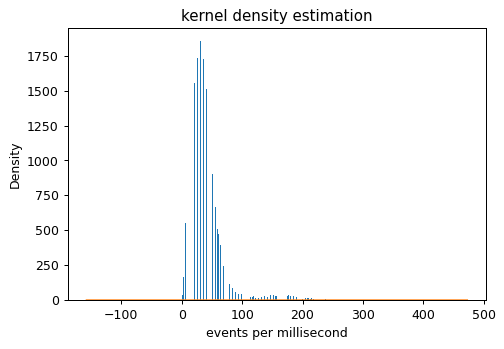

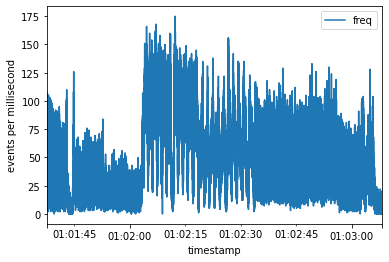

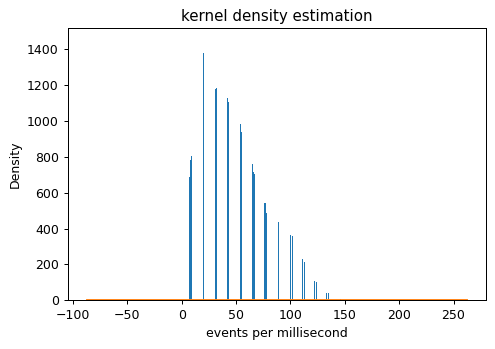

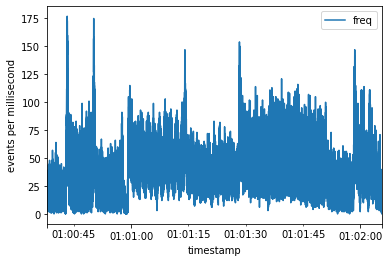

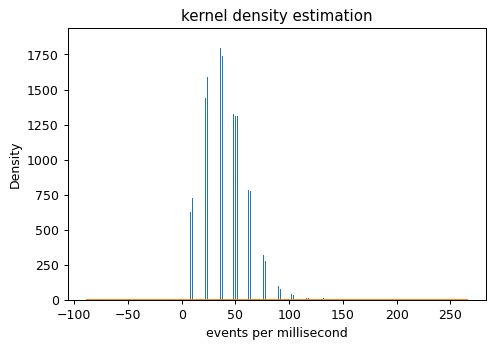

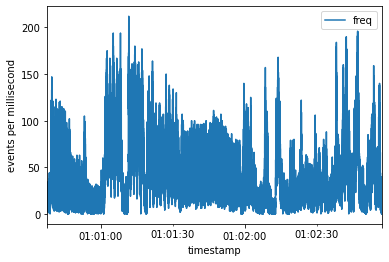

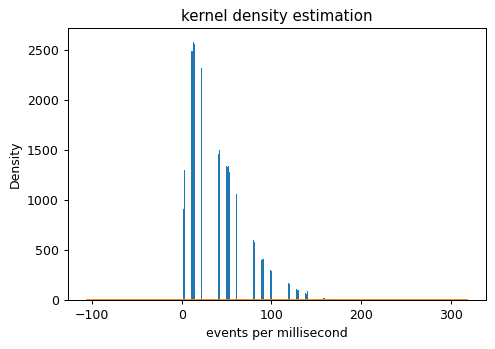

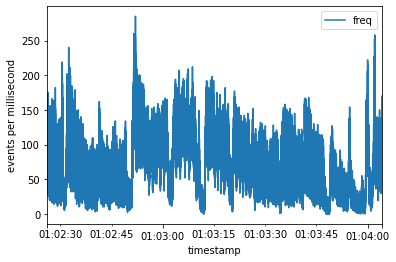

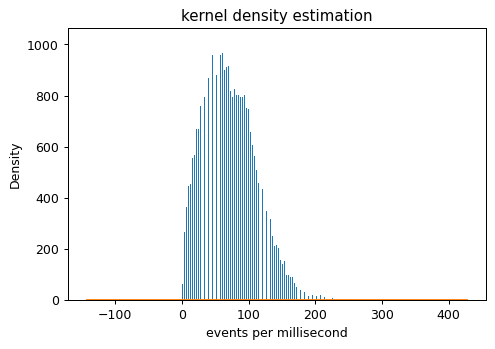

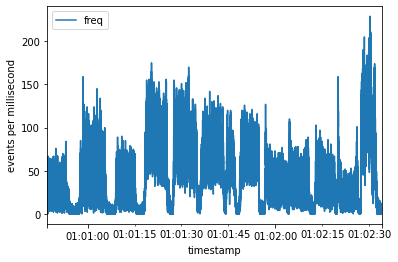

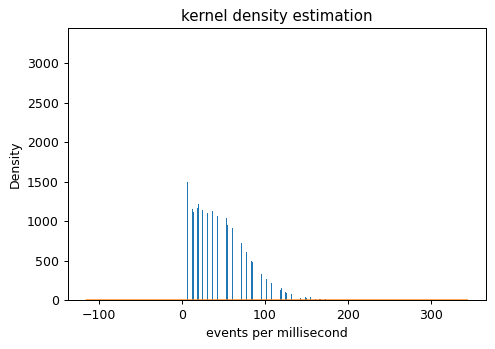

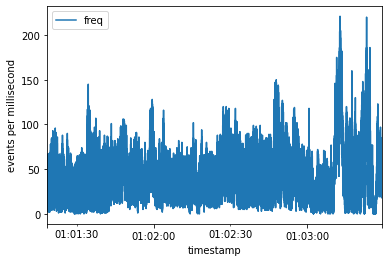

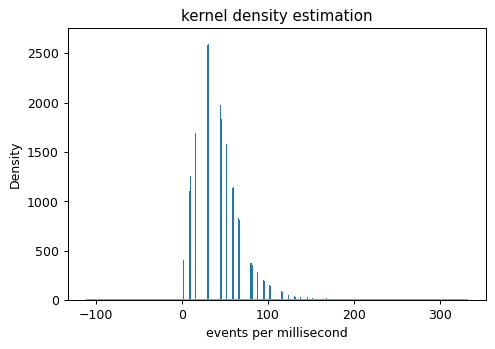

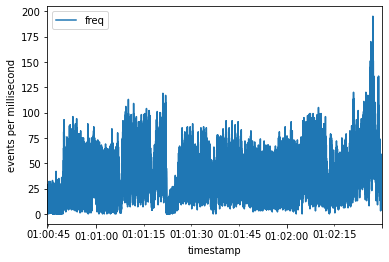

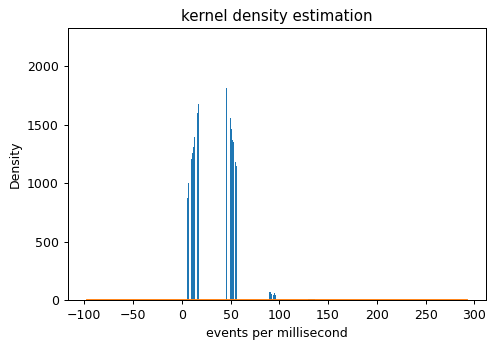

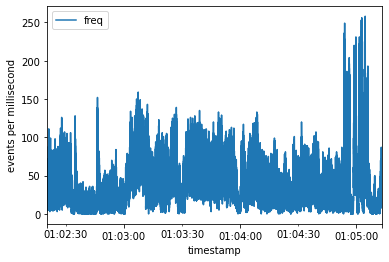

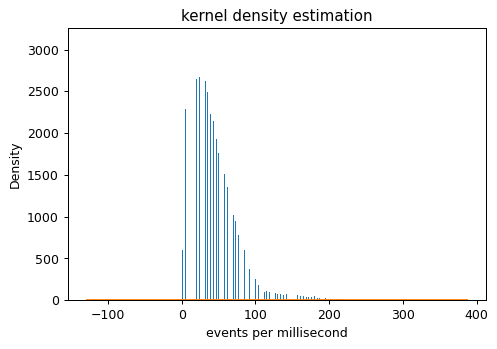

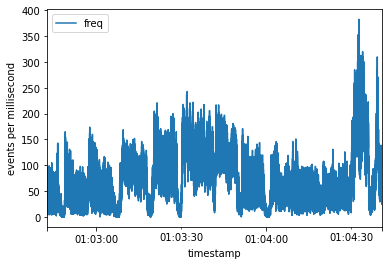

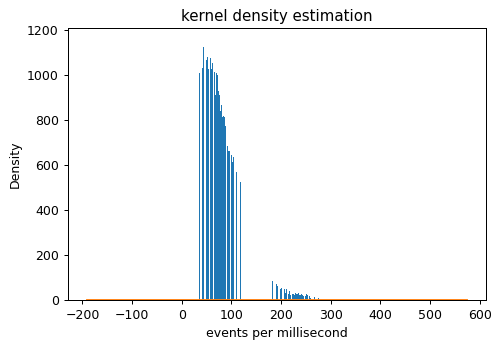

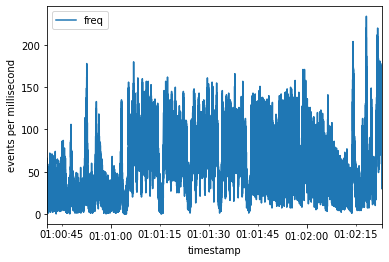

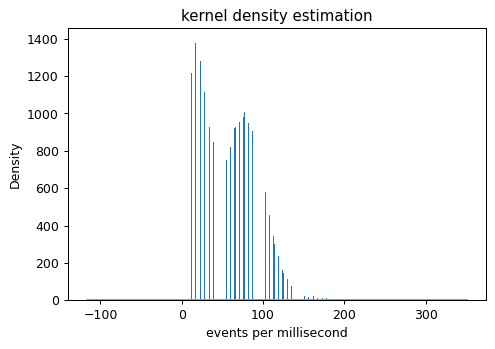

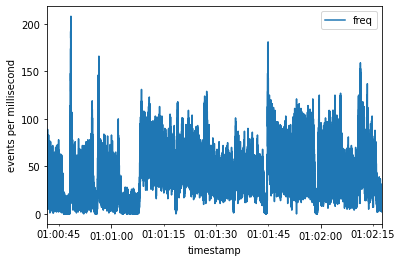

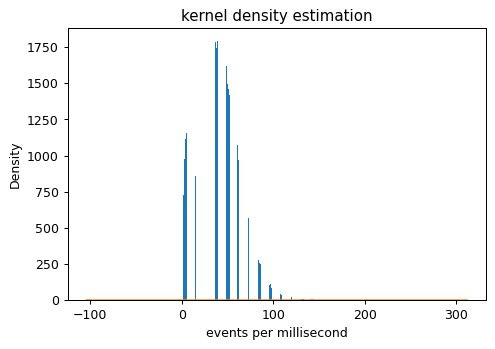

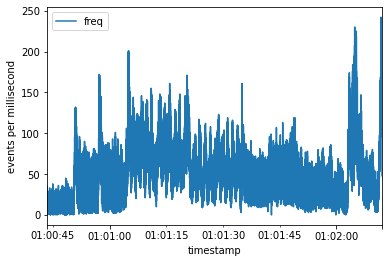

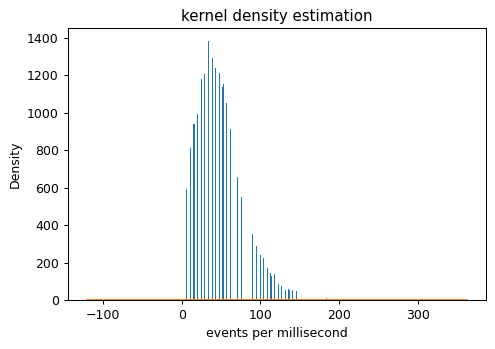

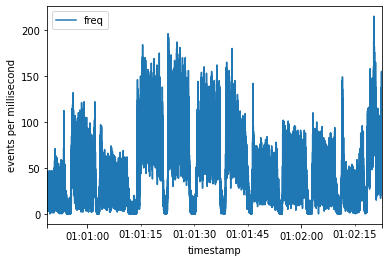

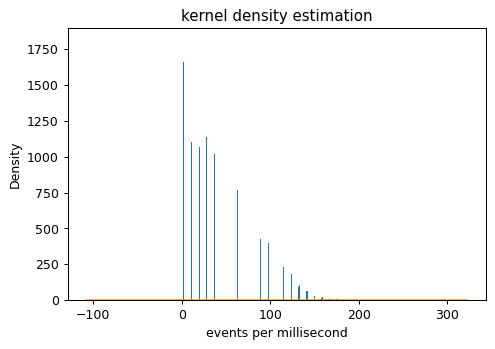

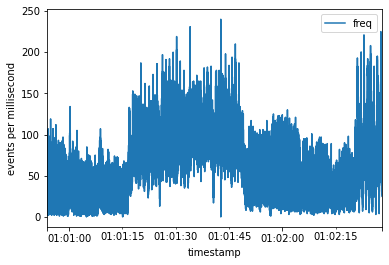

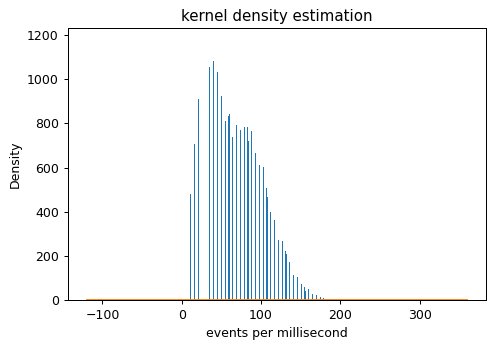

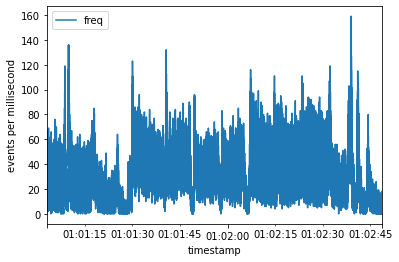

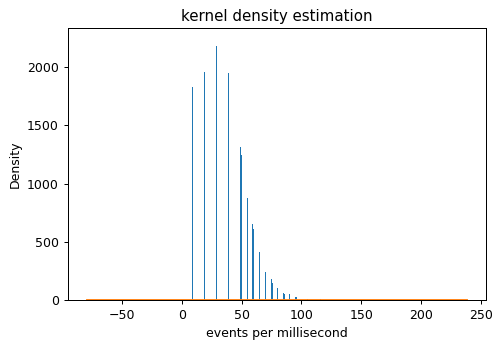

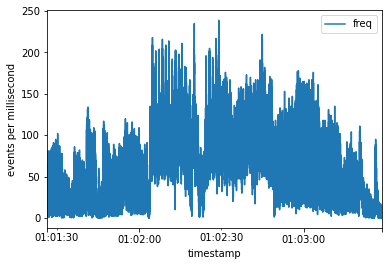

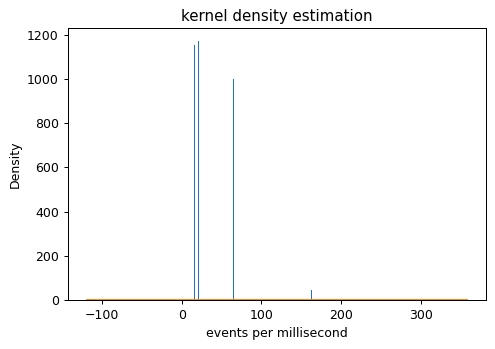

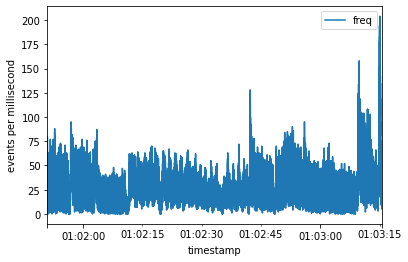

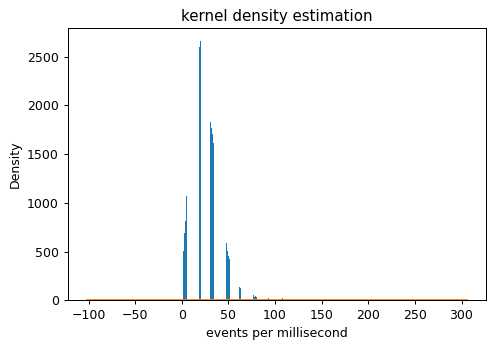

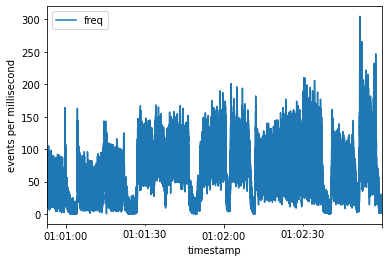

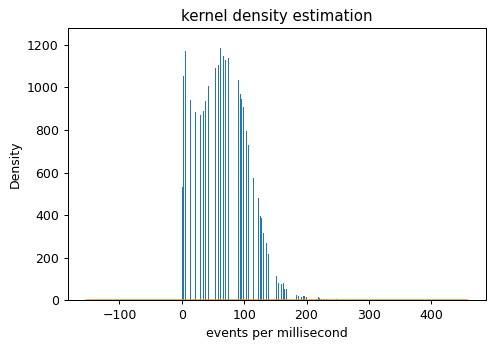

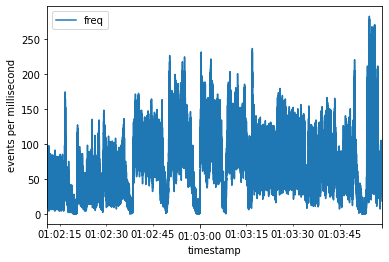

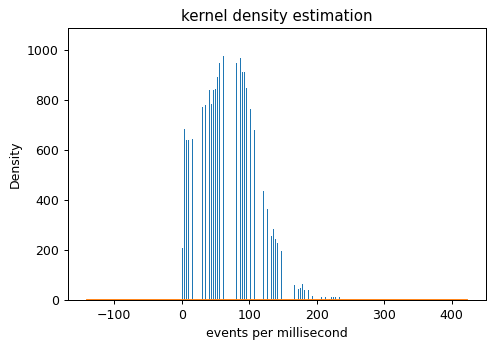

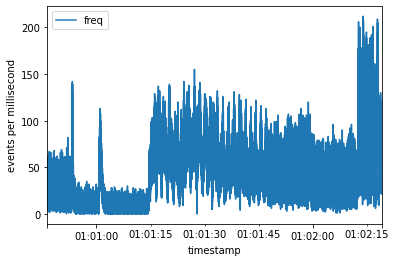

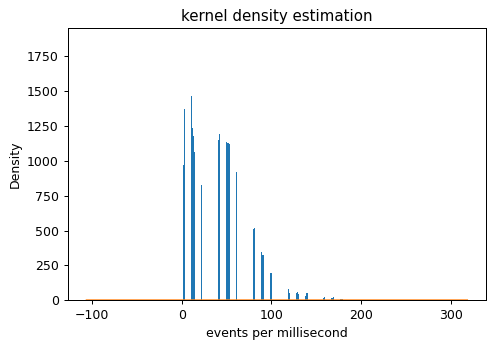

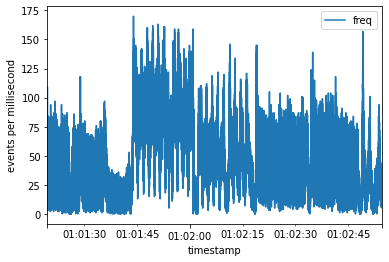

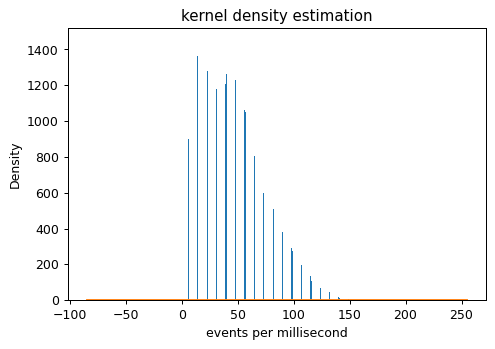

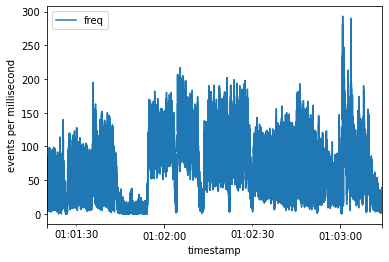

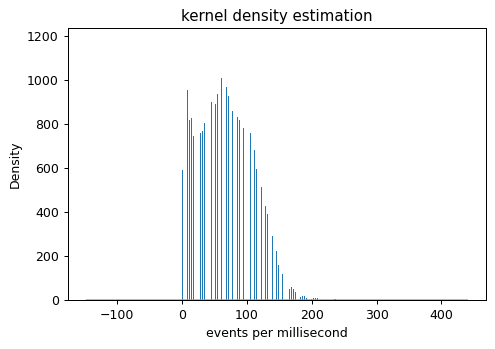

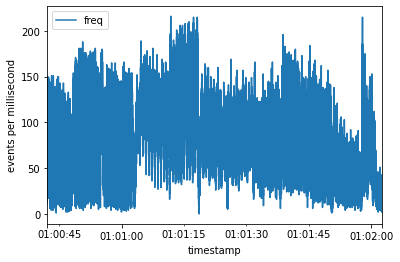

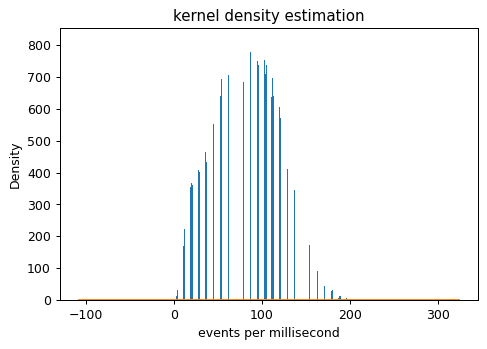

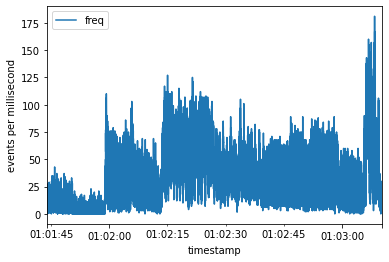

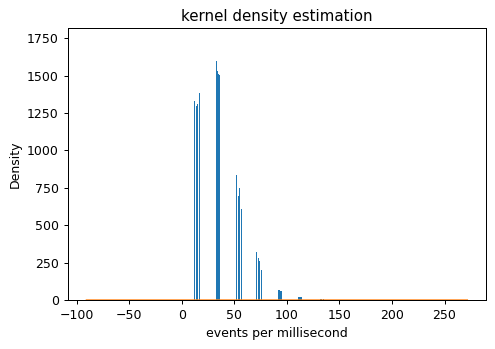

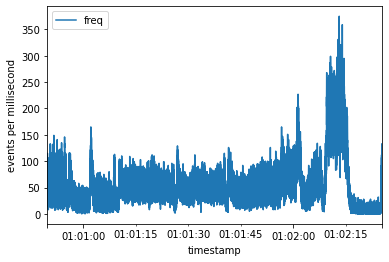

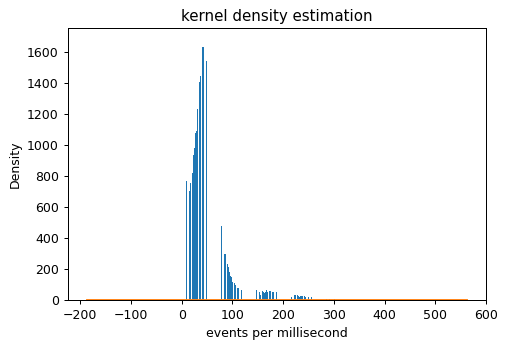

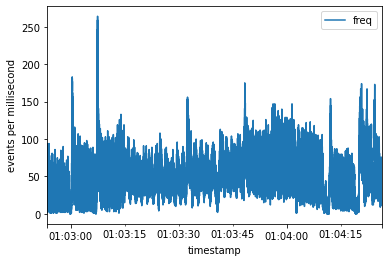

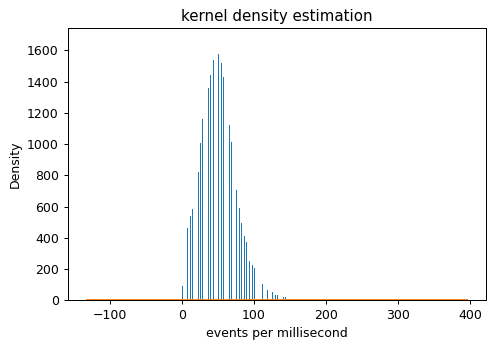

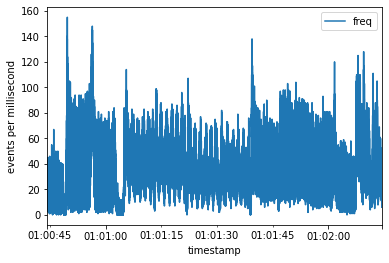

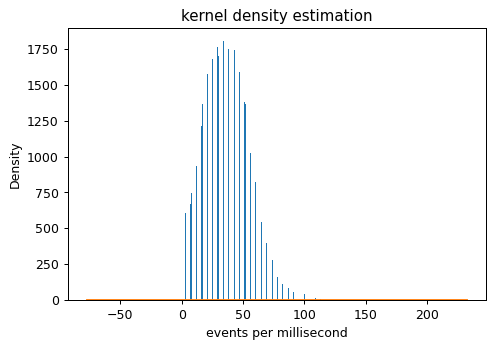

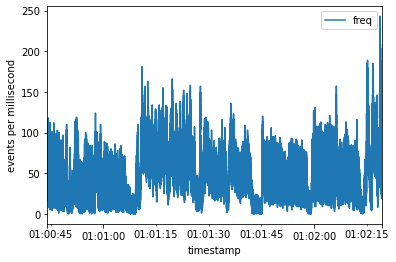

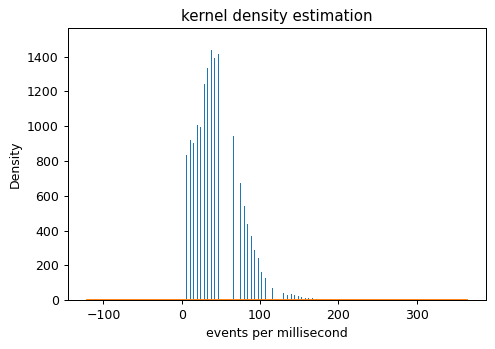

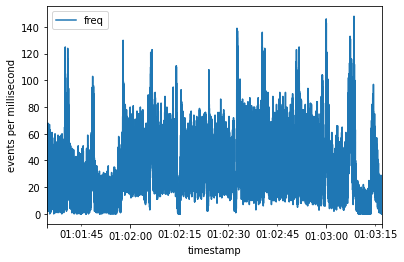

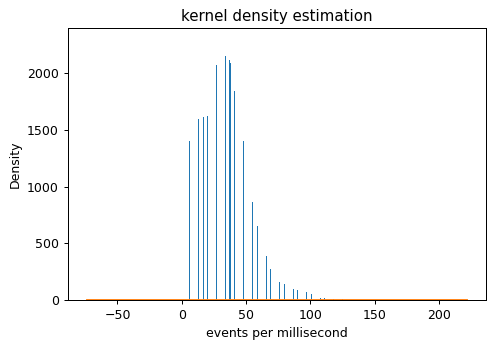

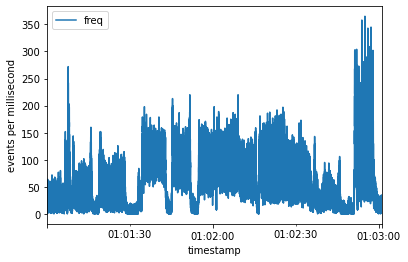

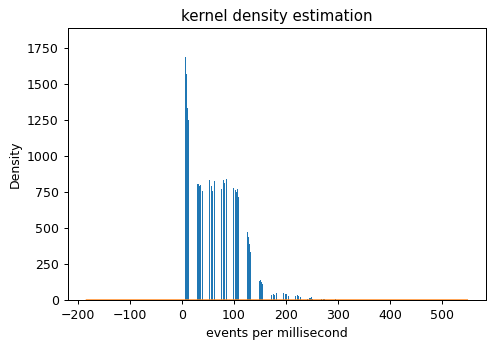

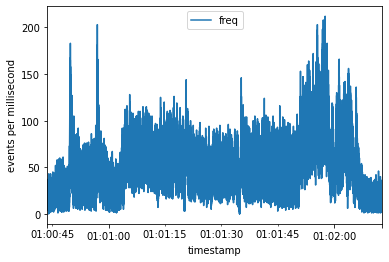

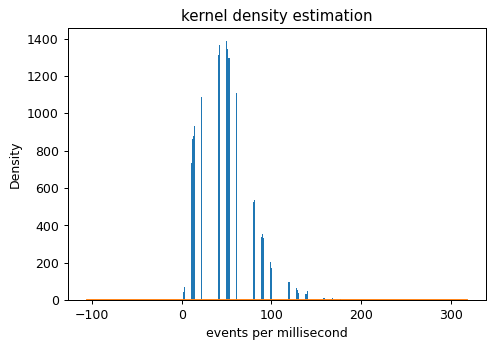

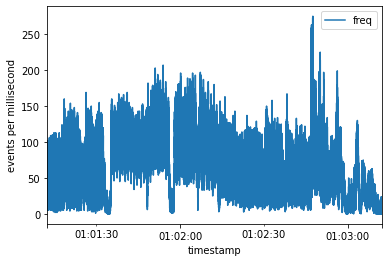

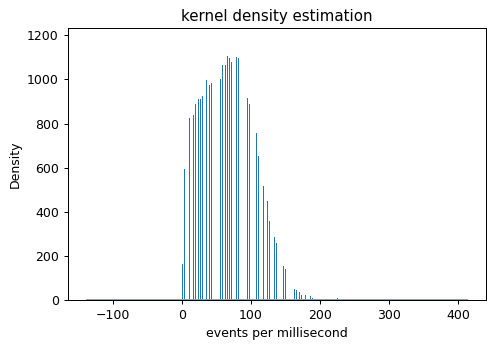

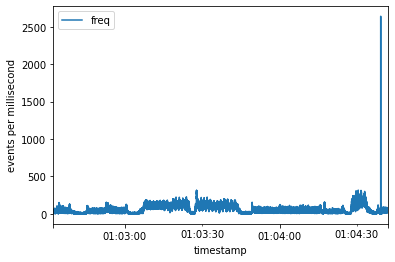

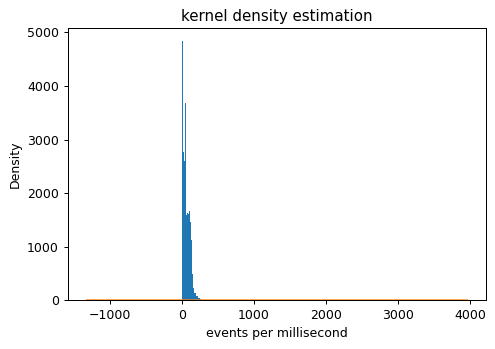

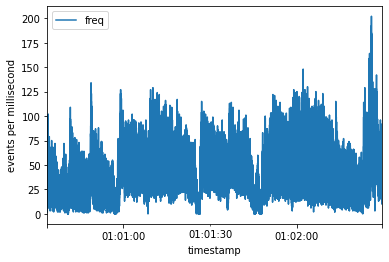

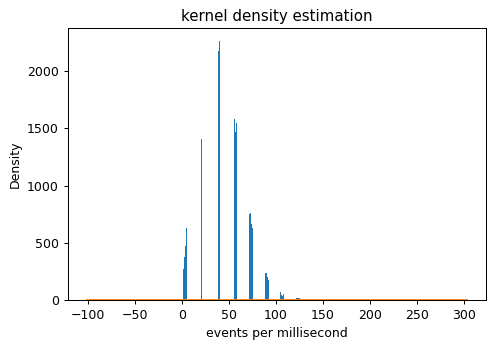

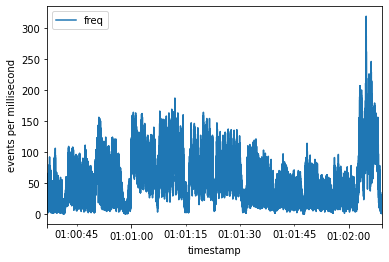

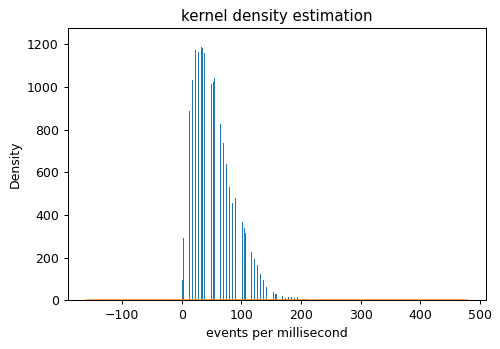

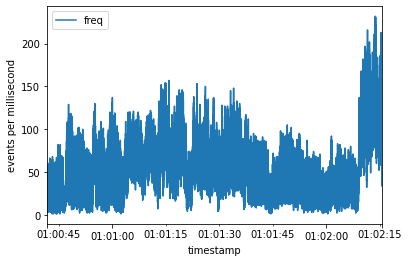

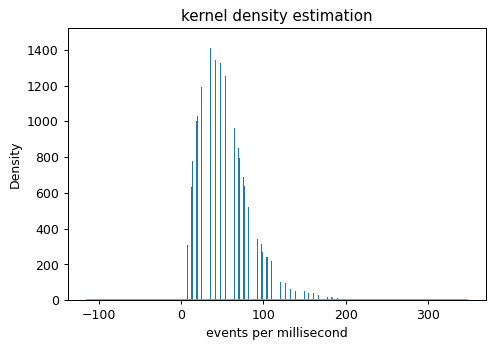

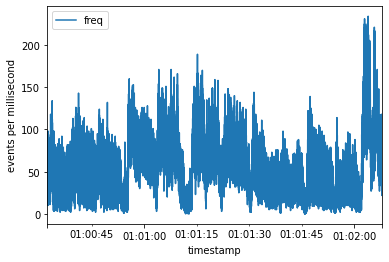

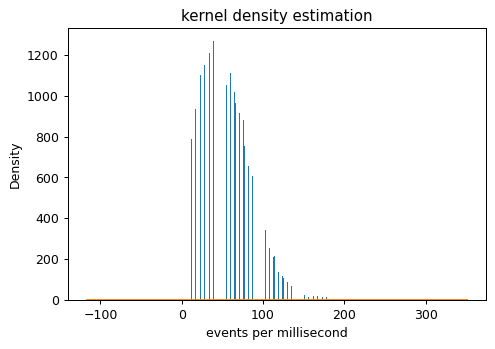

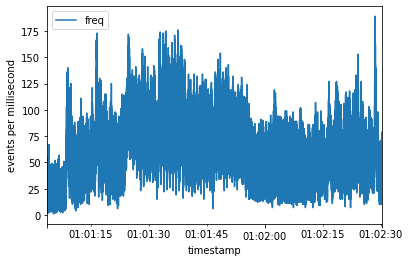

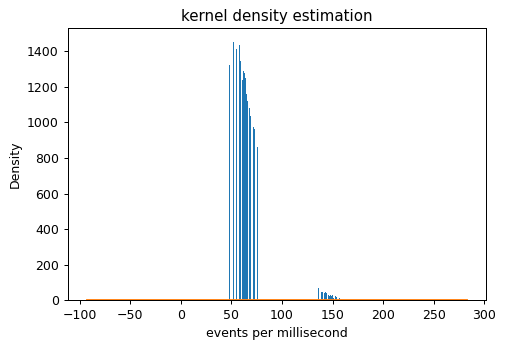

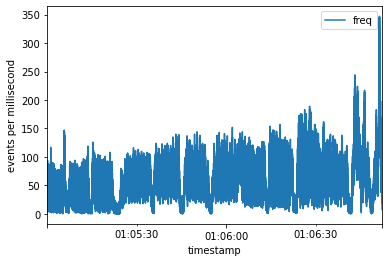

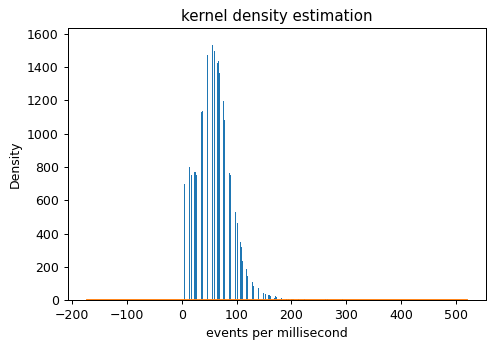

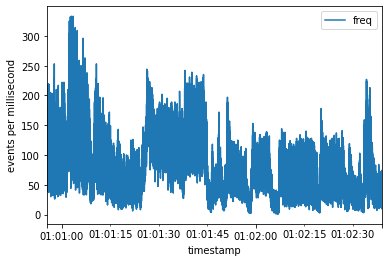

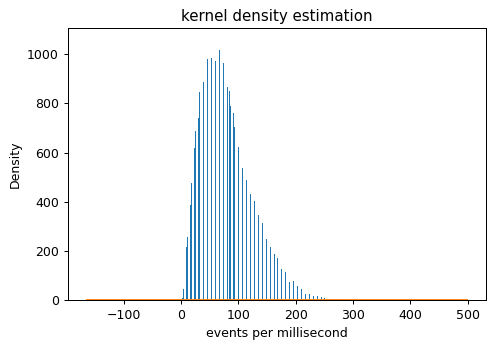

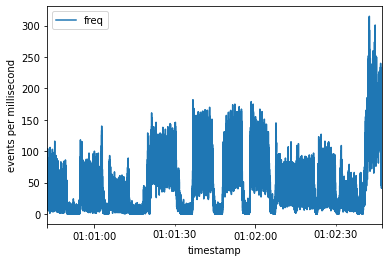

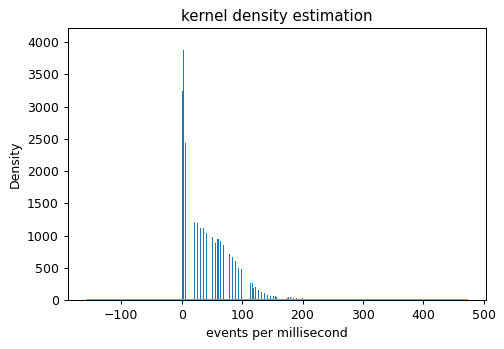

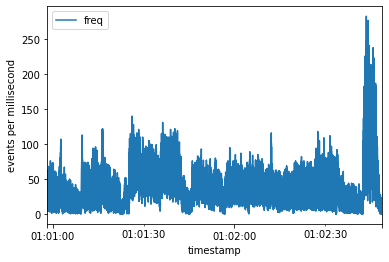

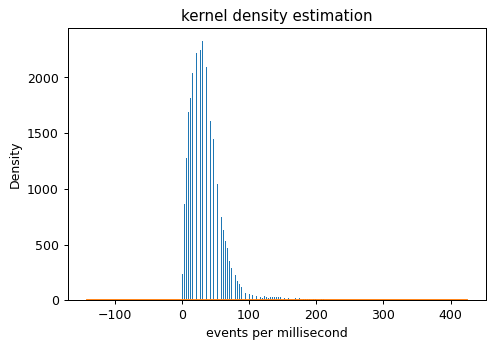

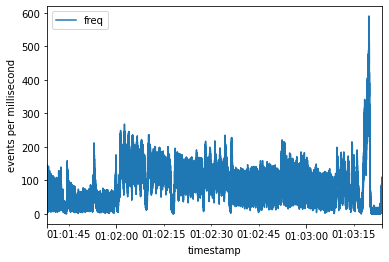

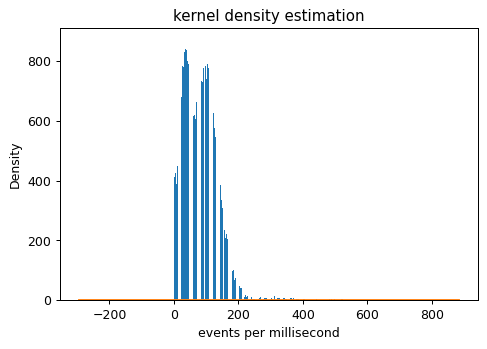

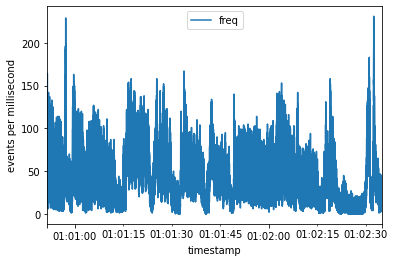

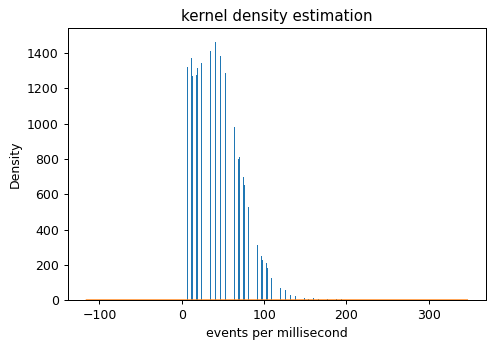

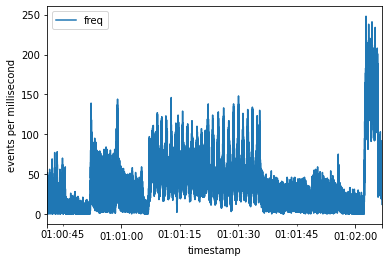

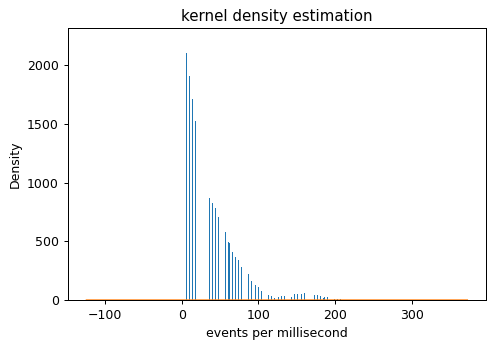

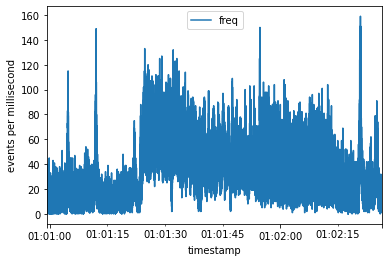

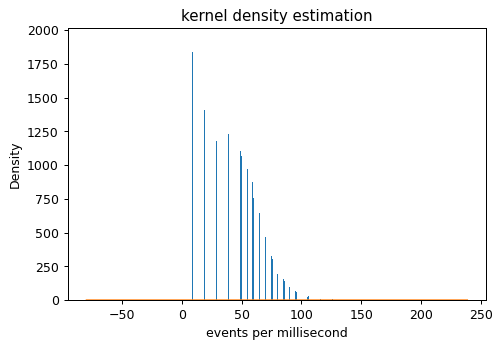

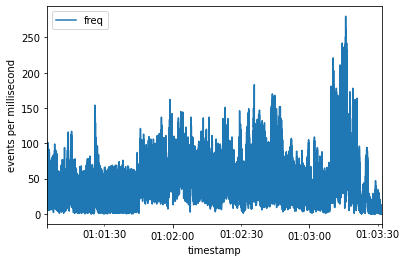

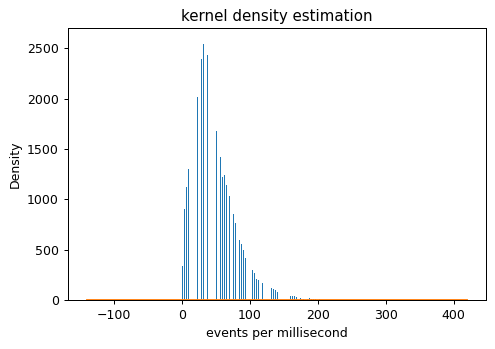

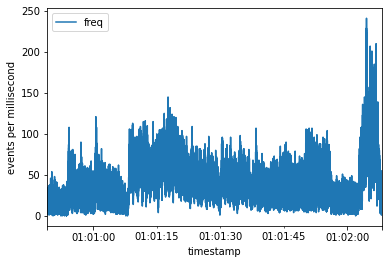

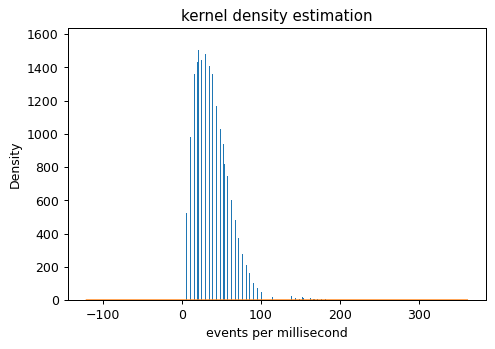

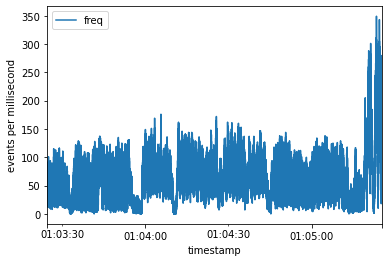

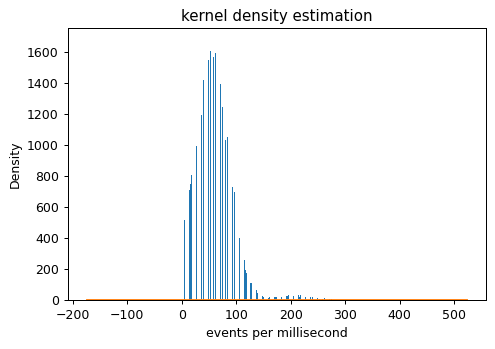

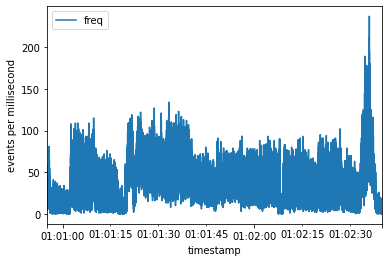

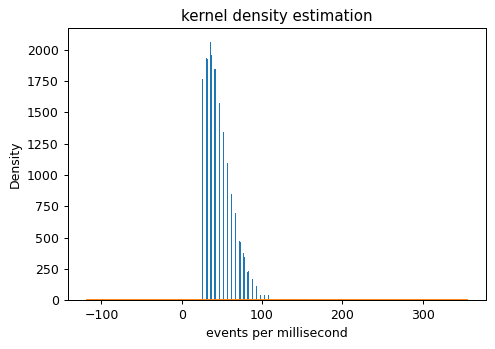

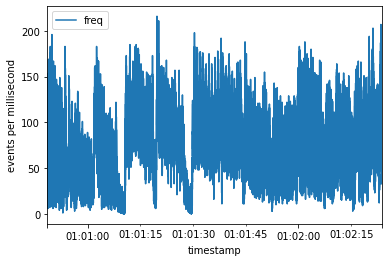

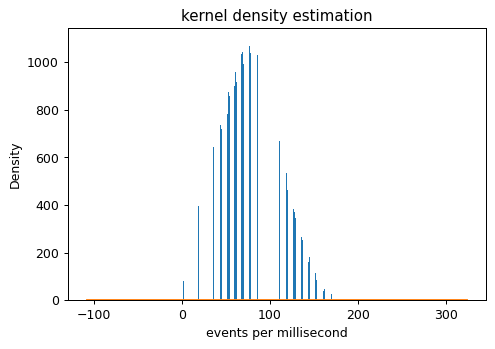

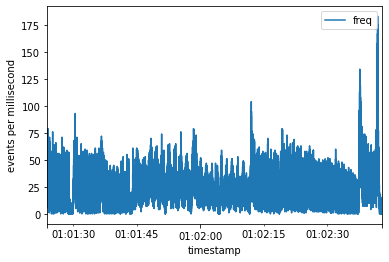

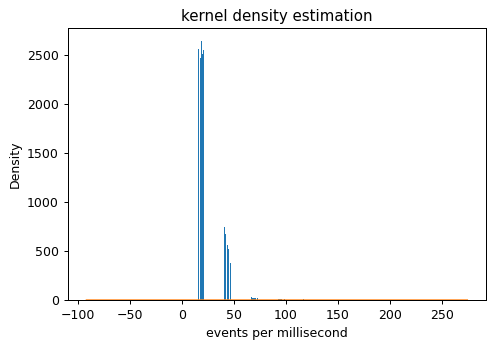

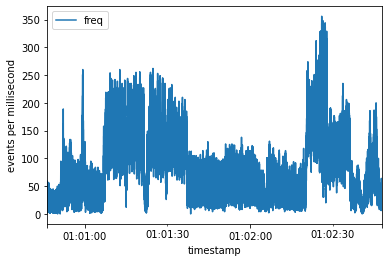

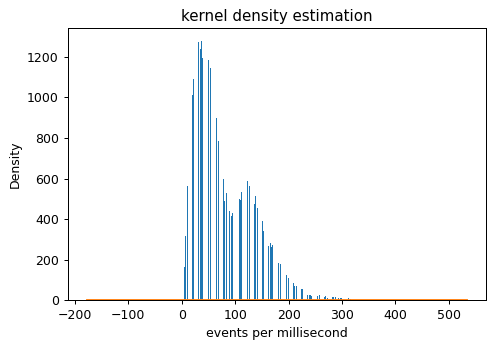

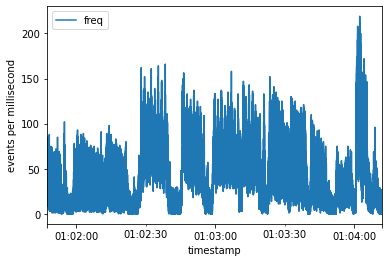

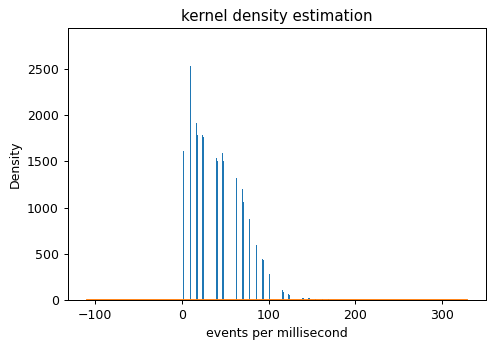

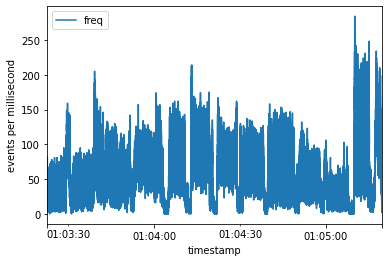

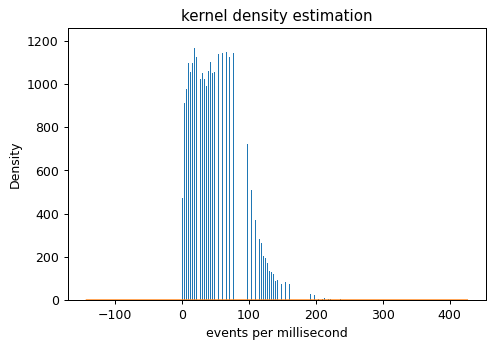

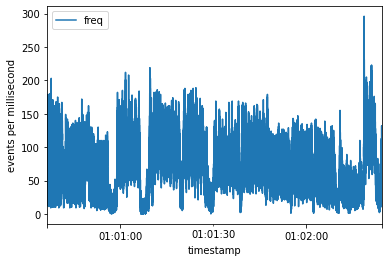

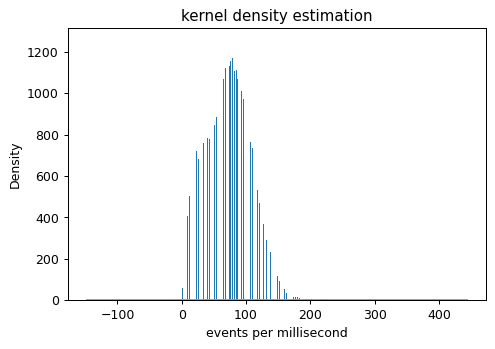

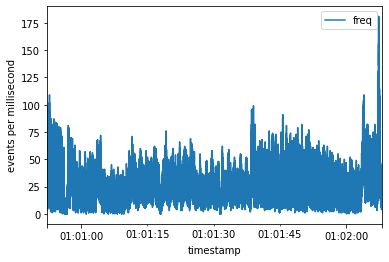

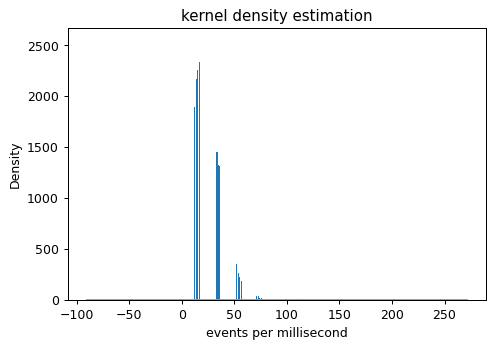

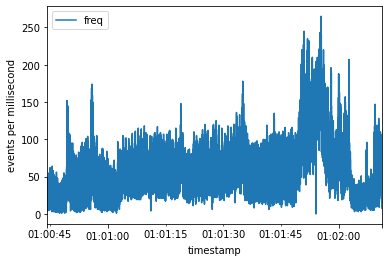

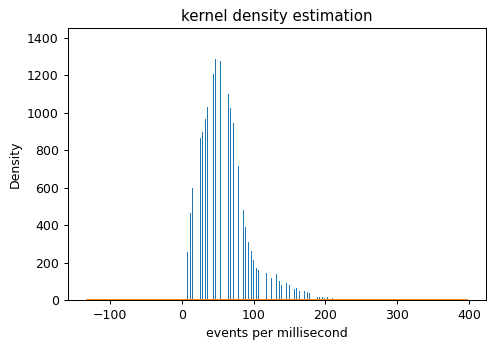

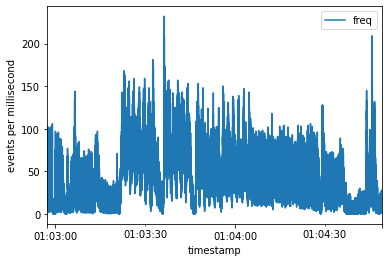

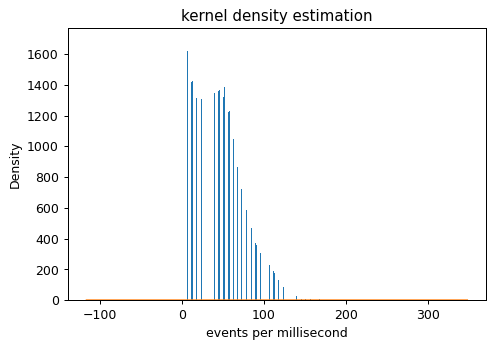

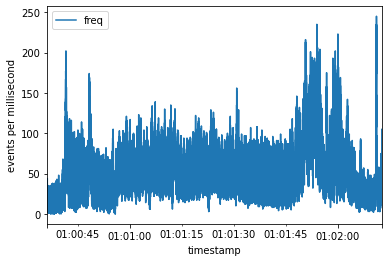

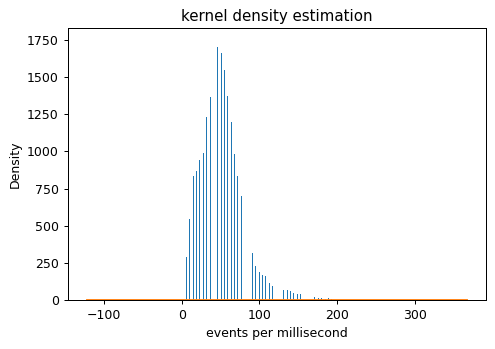

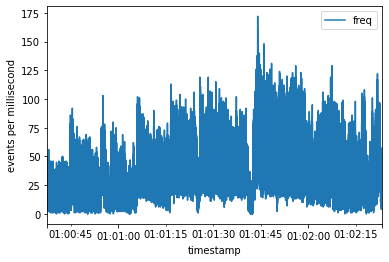

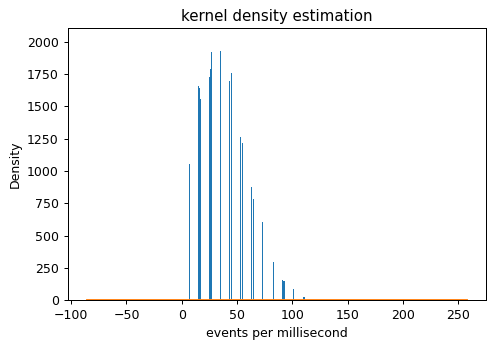

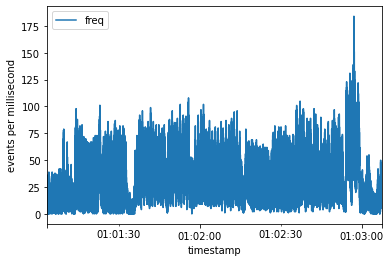

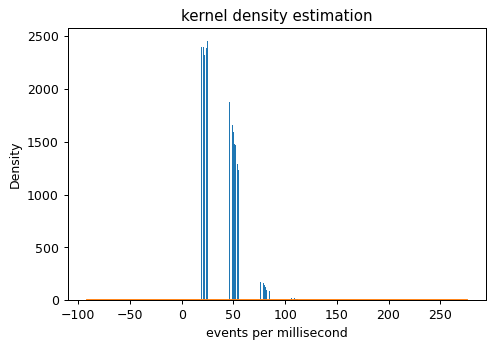

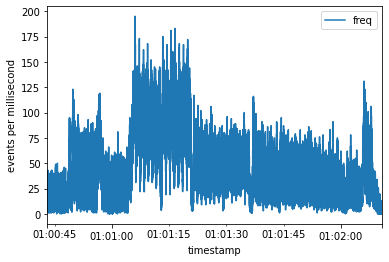

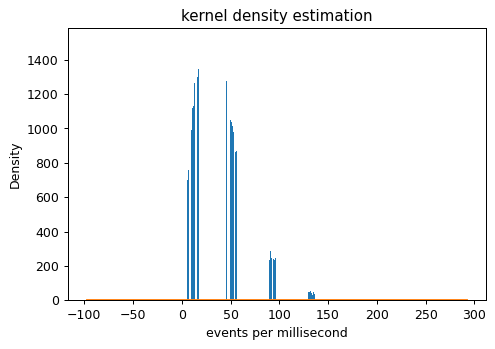

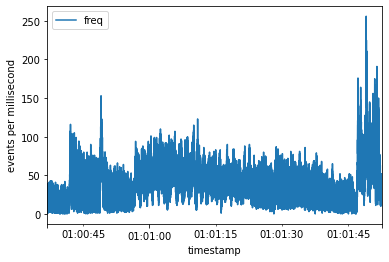

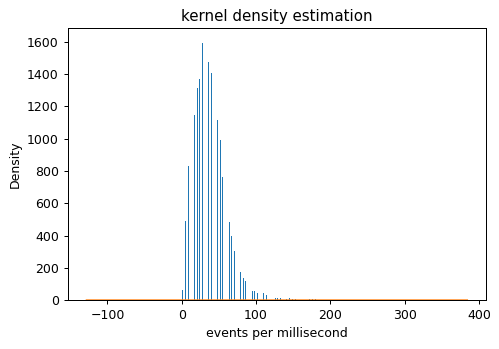

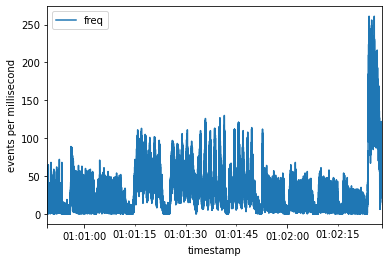

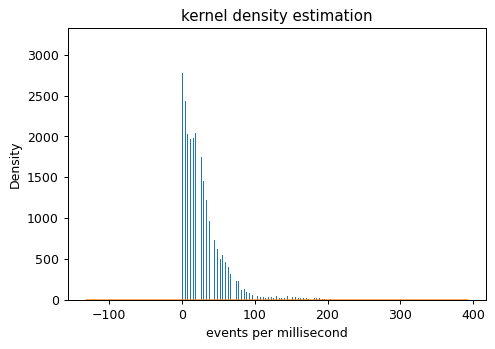

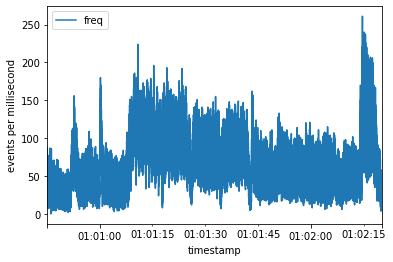

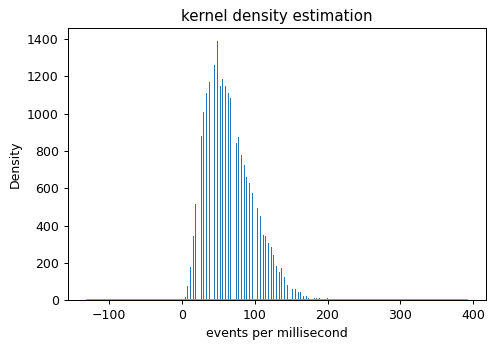

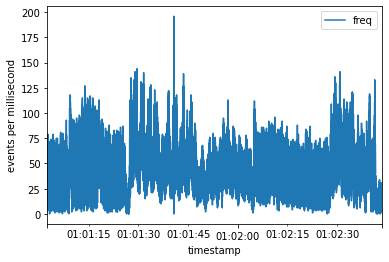

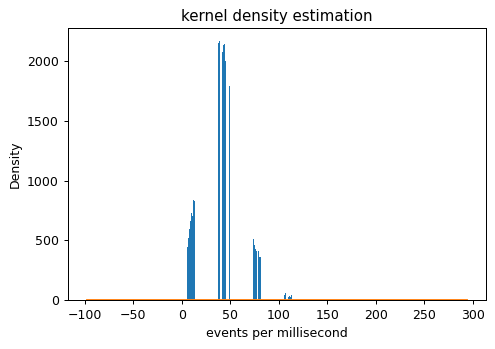

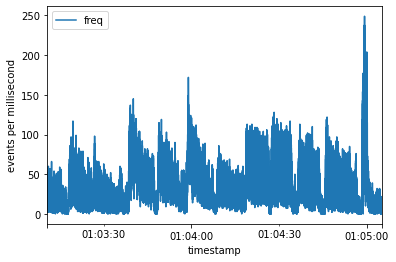

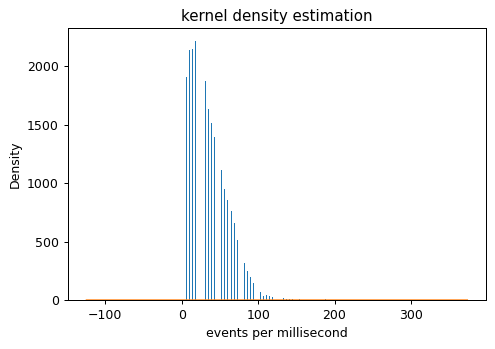

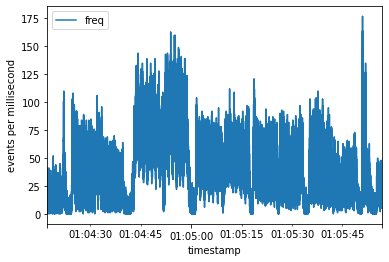

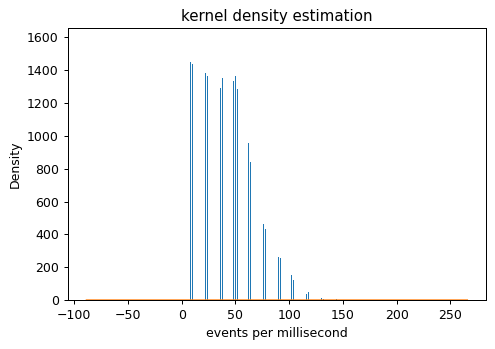

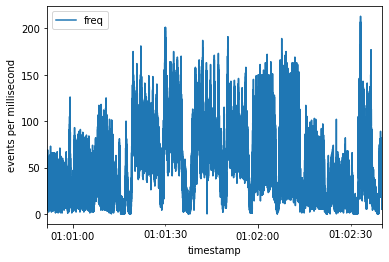

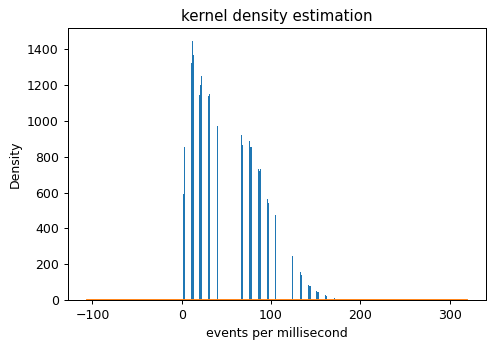

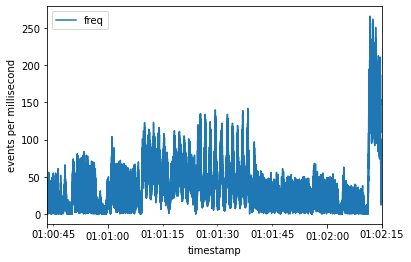

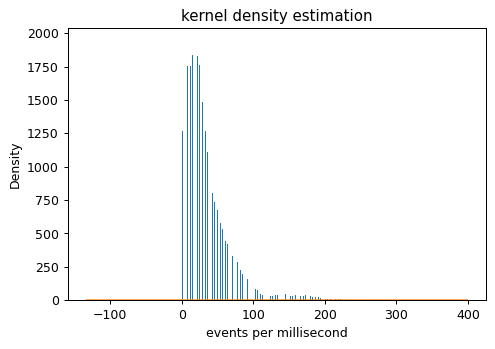

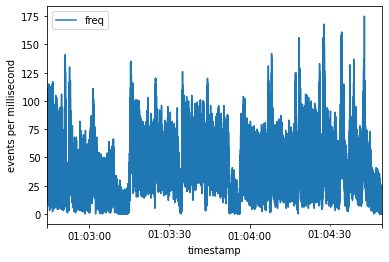

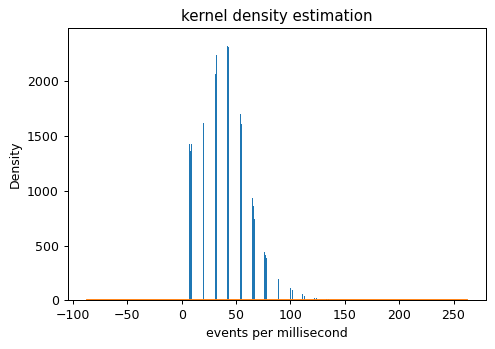

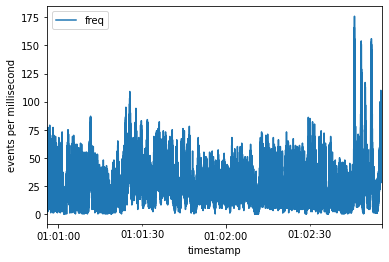

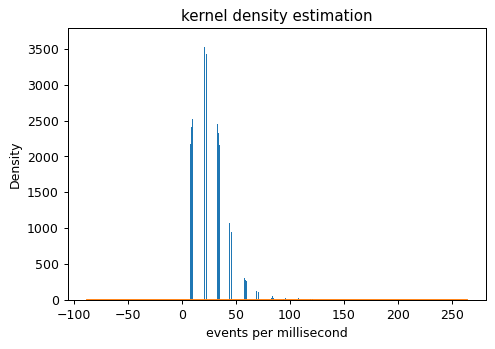

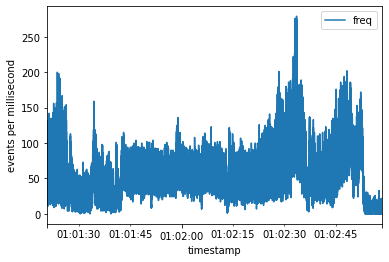

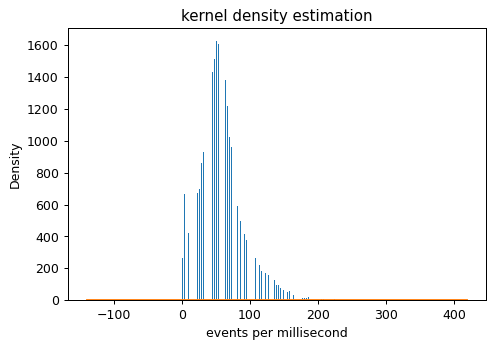

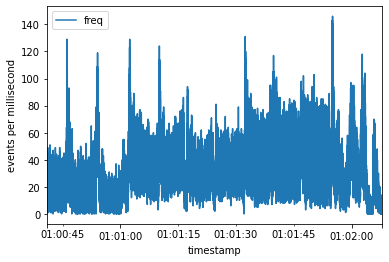

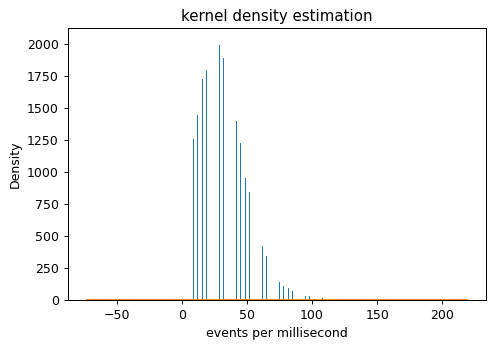

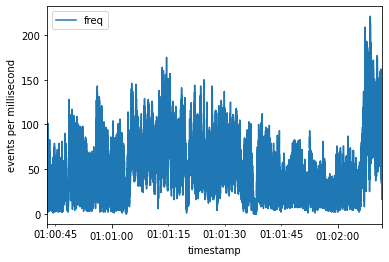

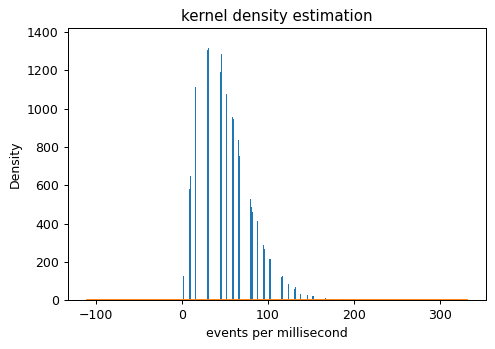

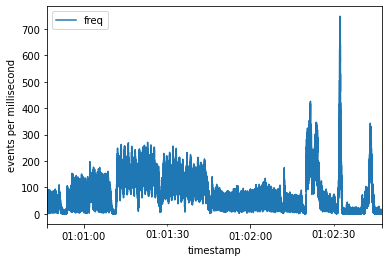

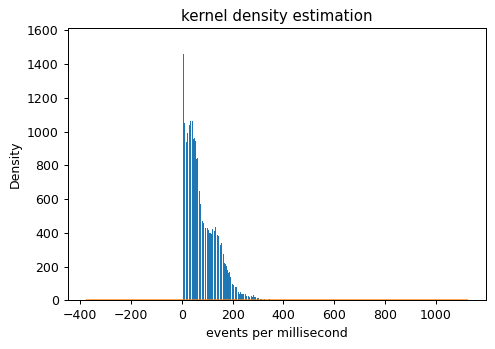

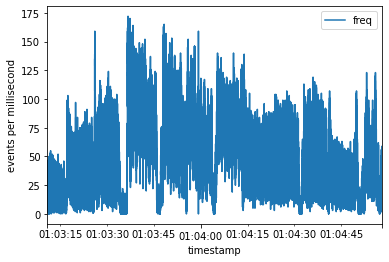

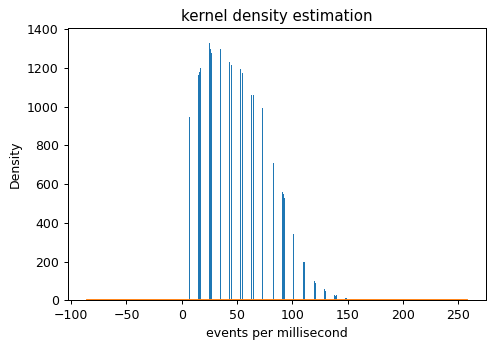

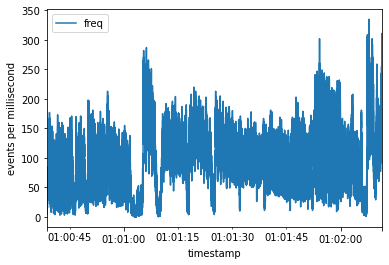

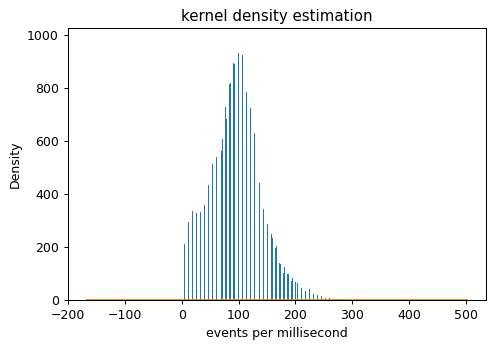

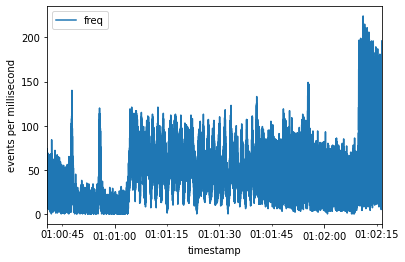

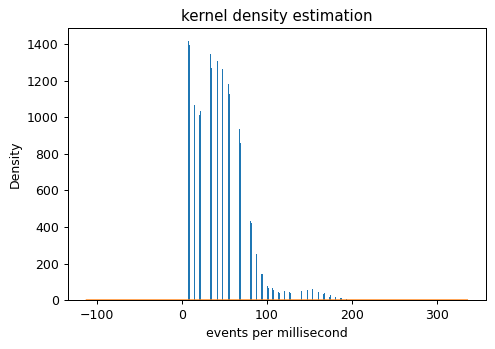

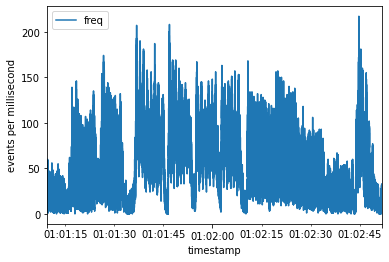

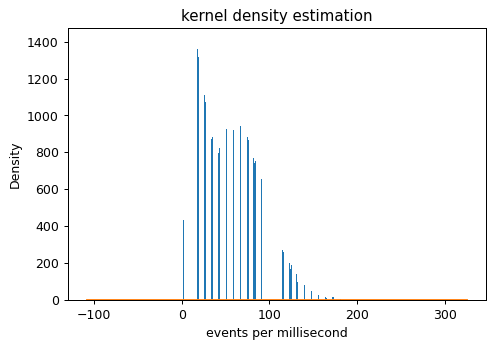

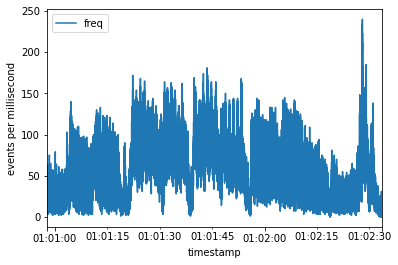

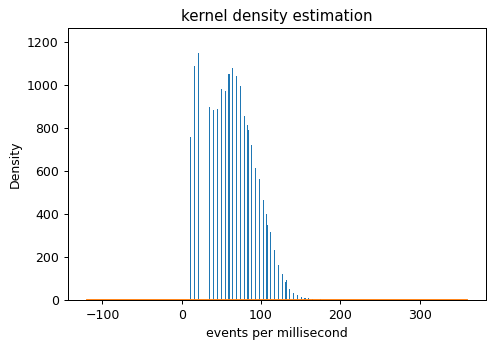

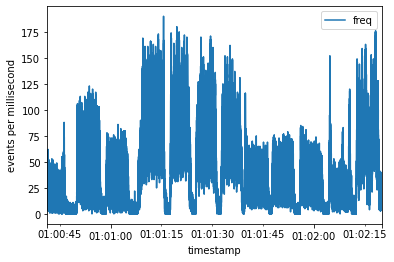

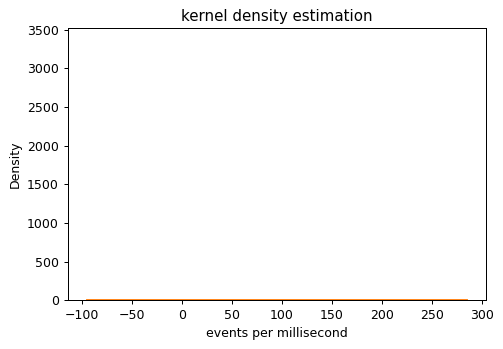

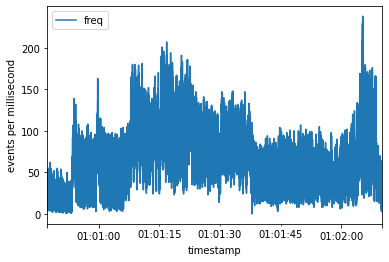

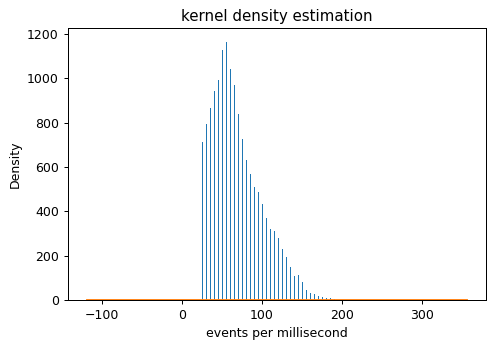

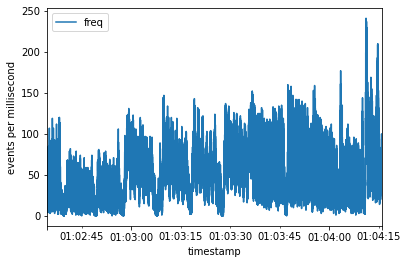

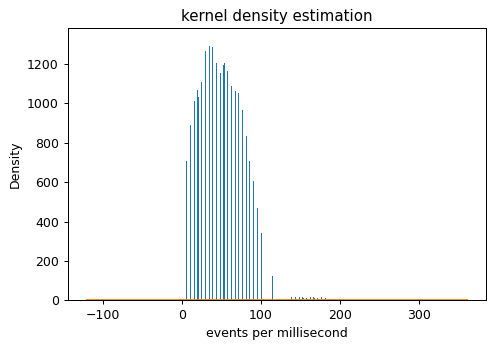

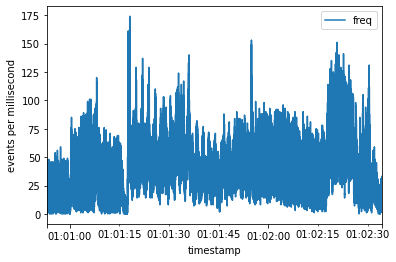

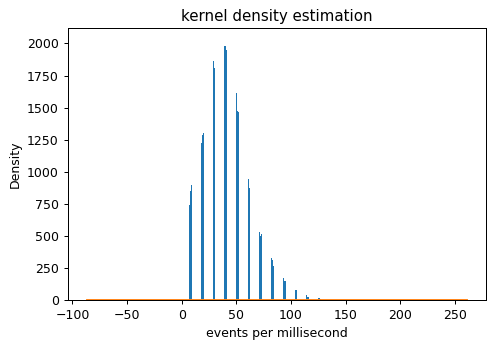

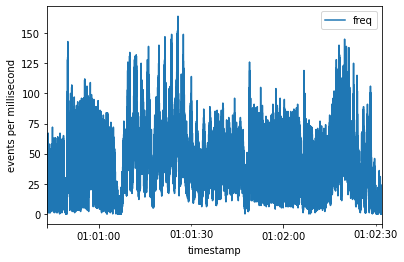

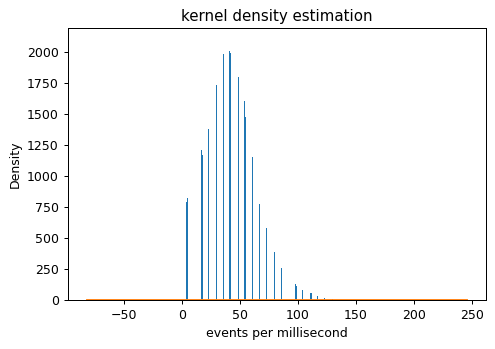

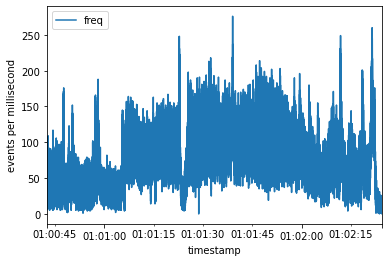

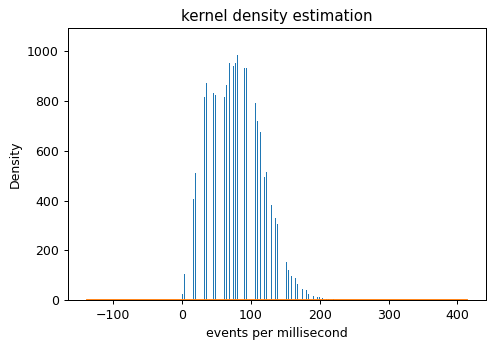

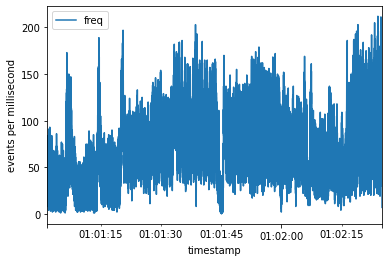

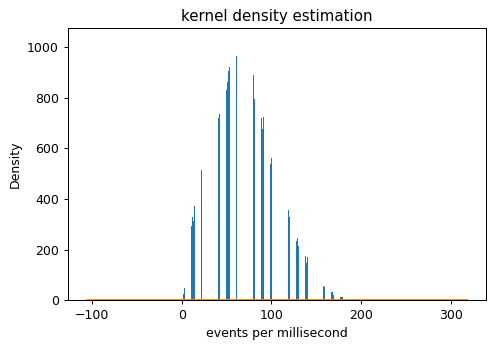

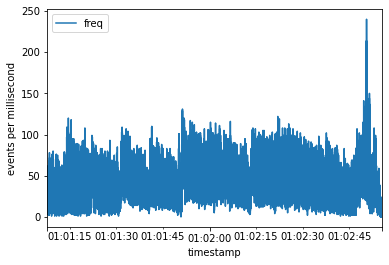

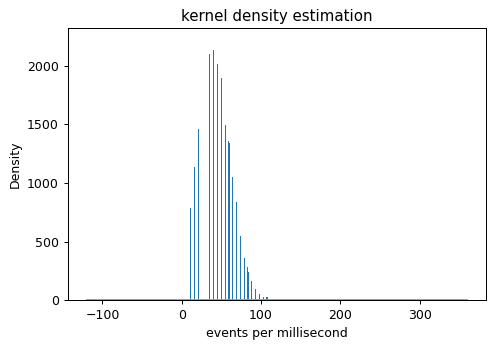

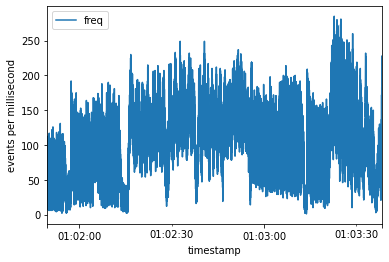

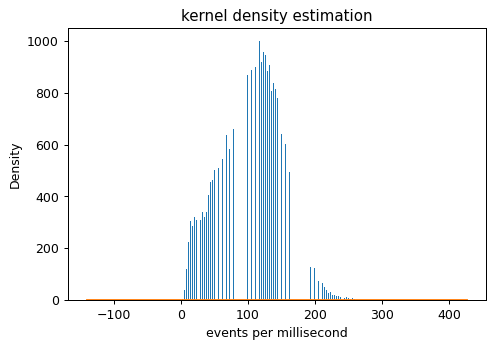

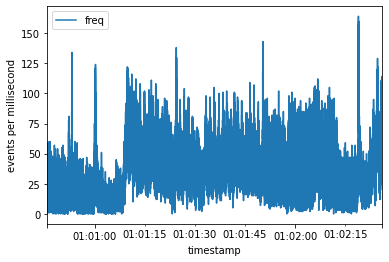

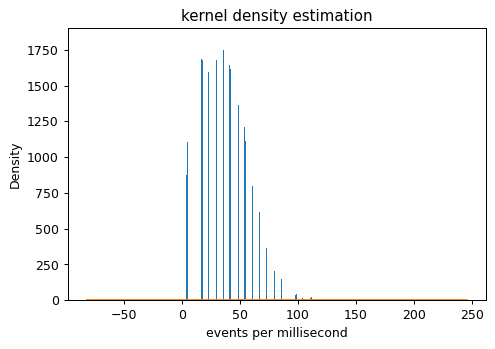

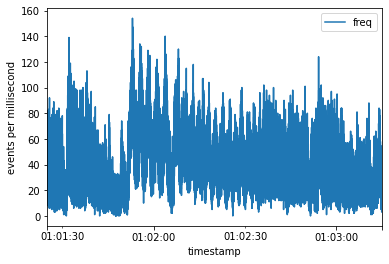

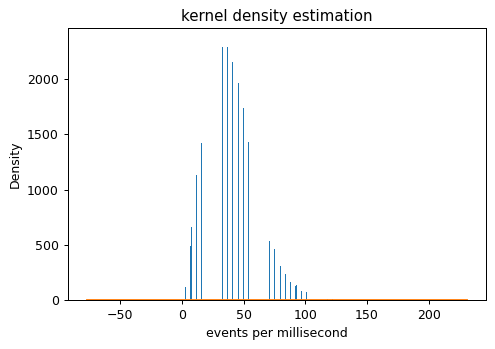

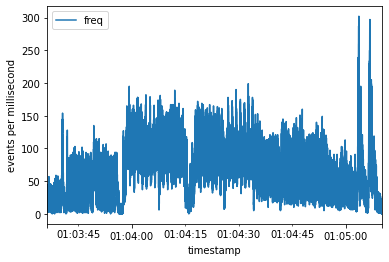

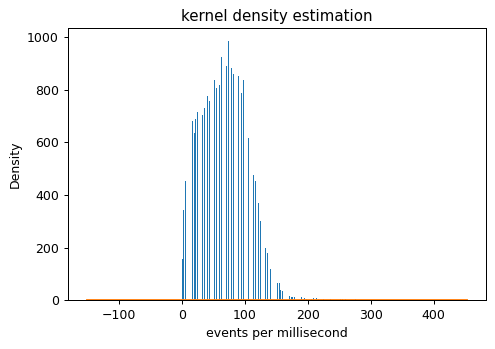

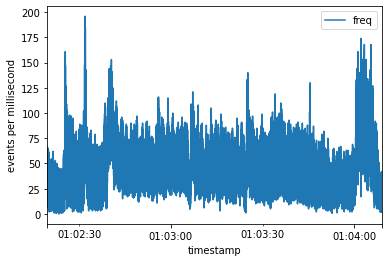

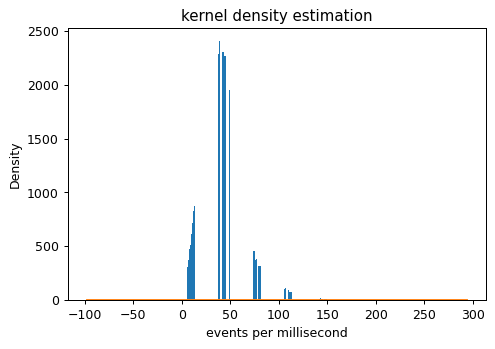

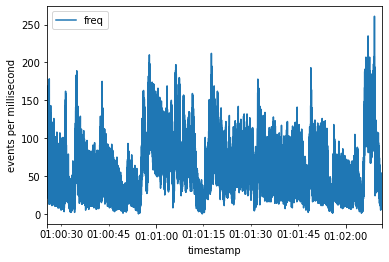

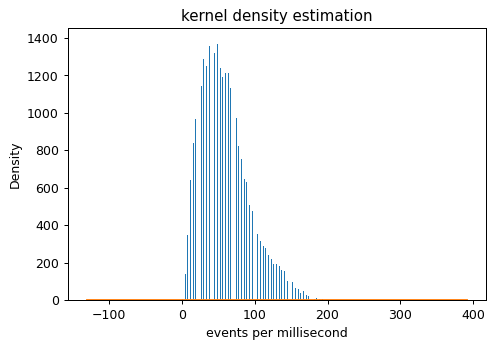

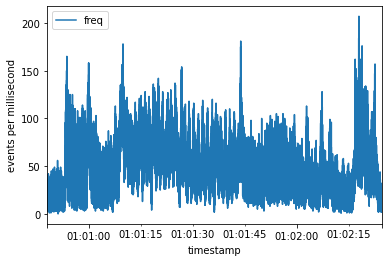

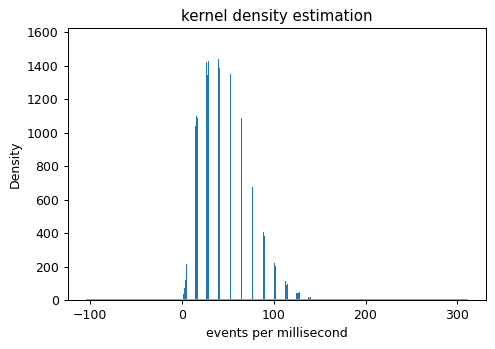

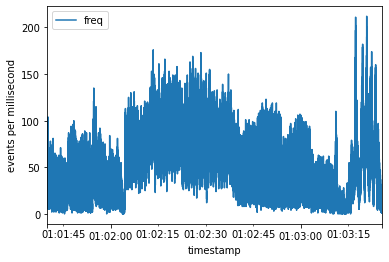

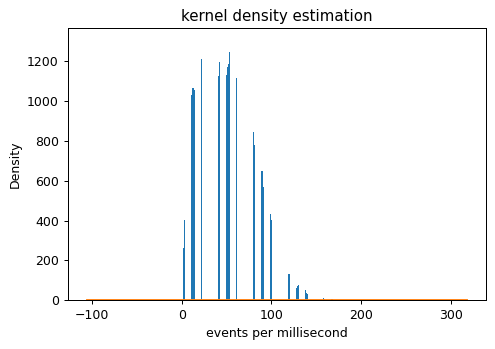

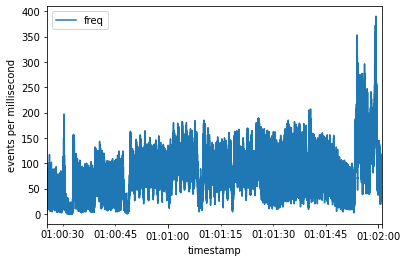

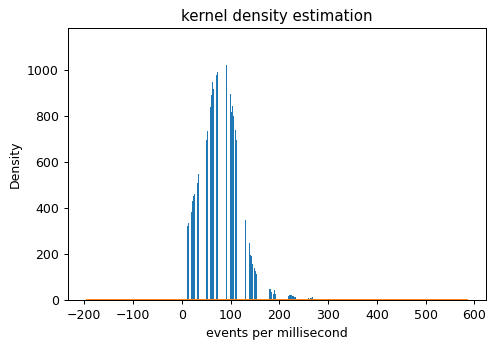

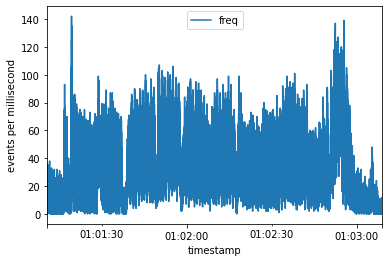

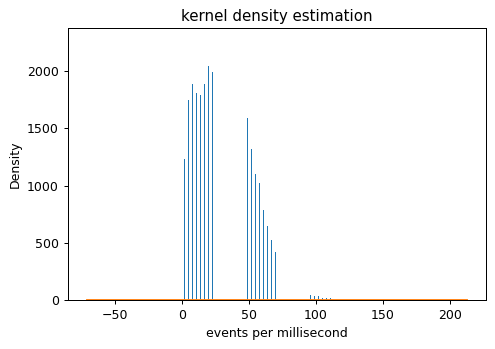

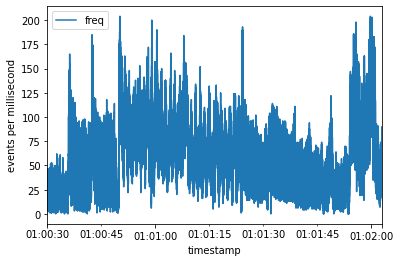

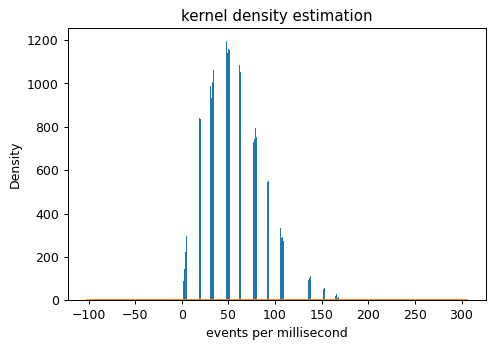

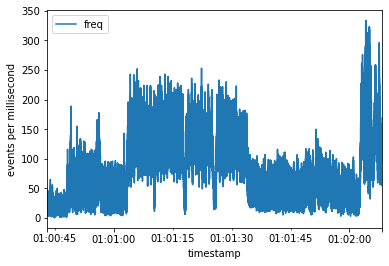

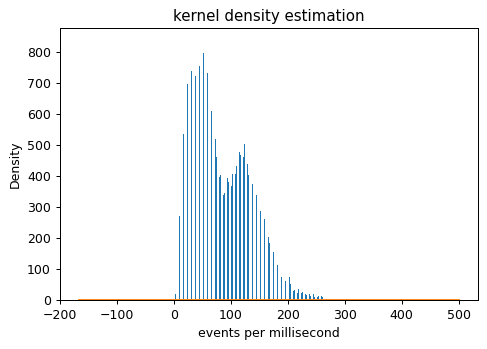

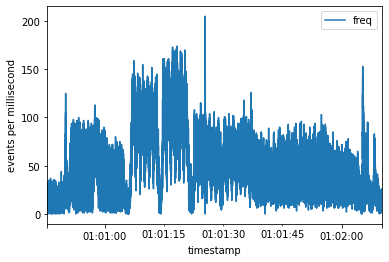

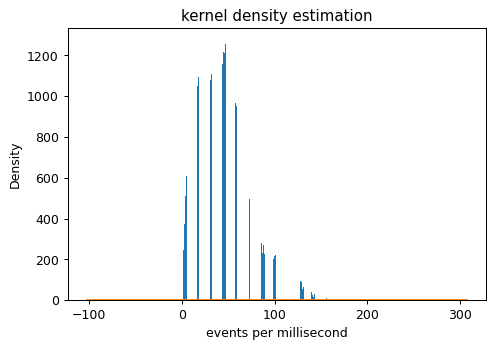

In [83]:
i = 0

for filepath in files:
    print('Processing file ' + str(i+1) + ' of ' + str(len(files)) + ' files. ...')
    filename = filepath.split('/')[-1]
    user = filename.split("_")[0][4:]
    lighting = filename[7:].split(".")[0]
    labels_path = "DvsGesture/user" + user + "_" + lighting + "_labels.csv"
    events_path = "DvsGesture/user" + user + "_" + lighting + ".aedat"

    # loading aedat file (events)
    shape, events = load_events_from_file(events_path, parser = parse_dvs_ibm)

    df_events = pd.DataFrame(data=events, columns={'x', 'y', 't', 'p'})
    df_events = df_events[['x' ,'y', 't', 'p']]
    del events

    events_freq = df_events.copy()
    events_freq['t'] = events_freq['t'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000000))   # converting timestamps to datetime format                                                                    #convert timestamps to ts
    events_freq['freq'] = 1                         # frequency of events
    events_freq = events_freq.set_index('t')       # set ts as index
    events_freq_res = events_freq['freq'].resample('ms').sum().to_frame()       # resample to find events per ms

    # plots

#     ax0 = events_freq_res.iloc[:].plot(xlabel = 'timestamp', ylabel = 'events per millisecond')

#     plt.figure(dpi=90)
#     ax1 = events_freq_res['freq'].plot.hist(bins=1000)
#     ax1.set_xlabel('events per millisecond')
#     ax1.set_title('histogram')

#     ax2 = events_freq_res['freq'].plot.kde()
#     ax2.set_xlabel('events per millisecond')
#     ax2.set_title('kernel density estimation')
#     np.mean(events_freq_res['freq'])

    # end (plots)

    mean = np.mean(events_freq_res['freq'])
    median = np.median(events_freq_res['freq'])
    std = np.std(events_freq_res['freq'])

    df_results.loc[i]['user'] = user
    df_results.loc[i]['lighting'] = lighting
    df_results.loc[i]['mean_event_rate'] = mean
    df_results.loc[i]['median_event_rate'] = median
    df_results.loc[i]['std_event_rate'] = std

    i += 1
print('Process Complete')

In [102]:
df_results = df_results.sort_values(['user', 'lighting'])
df_results

user         lighting mean_event_rate median_event_rate std_event_rate
40   01      fluorescent          68.239                66         41.823
50   01  fluorescent_led         67.5776                67        38.1764
97   01              lab         95.0409                96        46.0968
69   01              led         75.3394                75        34.5092
36   01          natural         66.0216                65        40.2807
..  ...              ...             ...               ...            ...
39   29      fluorescent         45.1706                42        28.3413
19   29  fluorescent_led         48.0486                43        29.9463
61   29              lab         85.0806                81        55.8031
21   29              led         40.9569                34        30.3087
77   29          natural          44.004                41        29.5014

[122 rows x 5 columns]

In [103]:
df_results.to_csv('results_event_rate.csv')

In [94]:
# df_results_userwise = pd.DataFrame(index = range(29), columns = ['user', 'mean_event_rate_lab', 'mean_event_rate_fluorescent', 'mean_event_fluorescent_led', 'mean_event_rate_natural', 'mean_event_rate_led'])